##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# MNIST classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/quantum/tutorials/mnist"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/quantum/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial builds a quantum neural network (QNN) to classify a simplified version of MNIST, similar to the approach used in <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al</a>. The performance of the quantum neural network on this classical data problem is compared with a classical neural network.

## Setup

In [2]:
!pip install tensorflow==2.7.0

  Using cached tensorflow-2.7.0-cp37-cp37m-manylinux2010_x86_64.whl (489.6 MB)


  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)


  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)


  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)


  Attempting uninstall: keras
    Found existing installation: keras 2.8.0


    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0


    Uninstalling tensorflow-2.8.0:


      Successfully uninstalled tensorflow-2.8.0


Install TensorFlow Quantum:

In [3]:
!pip install tensorflow-quantum

  Using cached tensorflow_quantum-0.6.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (10.5 MB)


  Using cached sympy-1.8-py3-none-any.whl (6.1 MB)


  Using cached google_auth-1.18.0-py2.py3-none-any.whl (90 kB)


  Using cached cirq_google-0.13.1-py3-none-any.whl (437 kB)


  Using cached google_api_core-1.21.0-py2.py3-none-any.whl (90 kB)


  Using cached googleapis_common_protos-1.52.0-py2.py3-none-any.whl (100 kB)


  Using cached cirq_core-0.13.1-py3-none-any.whl (1.6 MB)


  Using cached protobuf-3.17.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)


  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)


  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)


  Using cached duet-0.2.3-py3-none-any.whl (30 kB)


  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached google_api_core-1.31.5-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.31.4-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.3-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.31.2-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.1-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.0-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.30.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.29.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.28.0-py2.py3-none-any.whl (92 kB)


  Using cached google_api_core-1.27.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.26.3-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.26.2-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.26.1-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.26.0-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.25.1-py2.py3-none-any.whl (92 kB)


  Using cached google_api_core-1.25.0-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.24.1-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.24.0-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.23.0-py2.py3-none-any.whl (91 kB)


  Using cached google_api_core-1.22.4-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.3-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.2-py2.py3-none-any.whl (91 kB)


  Using cached google_api_core-1.22.1-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.0-py2.py3-none-any.whl (91 kB)


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:


      Successfully uninstalled protobuf-3.19.4


  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.0.0
    Not uninstalling cachetools at /home/kbuilder/.local/lib/python3.7/site-packages, outside environment /tmpfs/src/tf_docs_env
    Can't uninstall 'cachetools'. No files were found to uninstall.
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.54.0


    Uninstalling googleapis-common-protos-1.54.0:


      Successfully uninstalled googleapis-common-protos-1.54.0


  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstalling google-auth-2.6.0:


      Successfully uninstalled google-auth-2.6.0


In [4]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/pkg_resources/__init__.py'>

Now import TensorFlow and the module dependencies:

In [5]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

2022-02-04 12:29:39.759643: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## 1. Load the data

In this tutorial you will build a binary classifier to distinguish between the digits 3 and 6, following <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> This section covers the data handling that:

- Loads the raw data from Keras.
- Filters the dataset to only 3s and 6s.
- Downscales the images so they fit can fit in a quantum computer.
- Removes any contradictory examples.
- Converts the binary images to Cirq circuits.
- Converts the Cirq circuits to TensorFlow Quantum circuits. 

### 1.1 Load the raw data

Load the MNIST dataset distributed with Keras. 

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

   16384/11490434 [..............................] - ETA: 0s

11493376/11490434 [==============================] - 0s 0us/step


11501568/11490434 [==============================] - 0s 0us/step


Number of original training examples: 60000
Number of original test examples: 10000


Filter the dataset to keep just the 3s and 6s,  remove the other classes. At the same time convert the label, `y`, to boolean: `True` for `3` and `False` for 6. 

In [7]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [8]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


Show the first example:

True


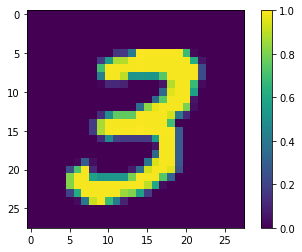

In [9]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

### 1.2 Downscale the images

An image size of 28x28 is much too large for current quantum computers. Resize the image down to 4x4:

In [10]:
x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

Again, display the first training example—after resize: 

True


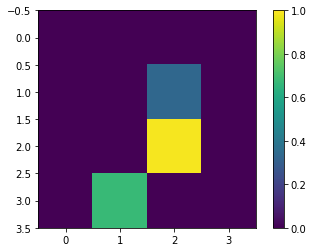

In [11]:
print(y_train[0])

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

### 1.3 Remove contradictory examples

From section *3.3 Learning to Distinguish Digits* of <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a>, filter the dataset to remove images that are labeled as belonging to both classes.

This is not a standard machine-learning procedure, but is included in the interest of following the paper.

In [12]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x,y in zip(xs,ys):
       orig_x[tuple(x.flatten())] = x
       mapping[tuple(x.flatten())].add(y)
    
    new_x = []
    new_y = []
    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          # Throw out images that match more than one label.
          pass
    
    num_uniq_3 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))
    
    return np.array(new_x), np.array(new_y)

The resulting counts do not closely match the reported values, but the exact procedure is not specified.

It is also worth noting here that applying filtering contradictory examples at this point does not totally prevent the model from receiving contradictory training examples: the next step binarizes the data which will cause more collisions. 

In [13]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338


### 1.4 Encode the data as quantum circuits

To process images using a quantum computer, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed representing each pixel with a qubit, with the state depending on the value of the pixel. The first step is to convert to a binary encoding.

In [14]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

If you were to remove contradictory images at this point you would be left with only 193, likely not enough for effective training.

In [15]:
_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 193
Number of unique 3s:  80
Number of unique 6s:  69
Number of unique contradicting labels (both 3 and 6):  44

Initial number of images:  10338
Remaining non-contradicting unique images:  149


The qubits at pixel indices with values that exceed a threshold, are rotated through an $X$ gate.

In [16]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

Here is the circuit created for the first example (circuit diagrams do not show qubits with zero gates):

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


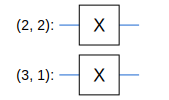

In [17]:
SVGCircuit(x_train_circ[0])

Compare this circuit to the indices where the image value exceeds the threshold:

In [18]:
bin_img = x_train_bin[0,:,:,0]
indices = np.array(np.where(bin_img)).T
indices

array([[2, 2],
       [3, 1]])

Convert these `Cirq` circuits to tensors for `tfq`:

In [19]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

## 2. Quantum neural network

There is little guidance for a quantum circuit structure that classifies images. Since the classification is based on the expectation of the readout qubit, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> propose using two qubit gates, with the readout qubit always acted upon. This is similar in some ways to running small a <a href="https://arxiv.org/abs/1511.06464" class="external">Unitary RNN</a> across the pixels.

### 2.1 Build the model circuit

This following example shows this layered approach. Each layer uses *n* instances of the same gate, with each of the data qubits acting on the readout qubit.

Start with a simple class that will add a layer of these gates to a circuit:

In [20]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

Build an example circuit layer to see how it looks:

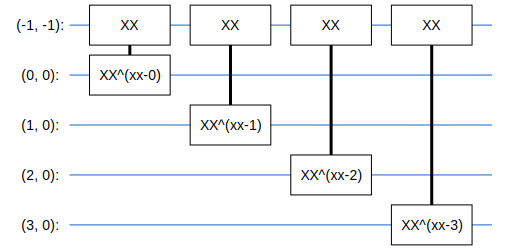

In [21]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

Now build a two-layered model, matching the data-circuit size, and include the preparation and readout operations.

In [22]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()
    
    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [23]:
model_circuit, model_readout = create_quantum_model()

### 2.2 Wrap the model-circuit in a tfq-keras model

Build the Keras model with the quantum components. This model is fed the "quantum data", from `x_train_circ`, that encodes the classical data. It uses a *Parametrized Quantum Circuit* layer, `tfq.layers.PQC`, to train the model circuit, on the quantum data.

To classify these images, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed taking the expectation of a readout qubit in a parameterized circuit. The expectation returns a value between 1 and -1.

In [24]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

Next, describe the training procedure to the model, using the `compile` method.

Since the the expected readout is in the range `[-1,1]`, optimizing the hinge loss is a somewhat natural fit. 

Note: Another valid approach would be to shift the output range to `[0,1]`, and treat it as the probability the model assigns to class `3`. This could be used with a standard a `tf.losses.BinaryCrossentropy` loss.

To use the hinge loss here you need to make two small adjustments. First convert the labels, `y_train_nocon`, from boolean to `[-1,1]`, as expected by the hinge loss.

In [25]:
y_train_hinge = 2.0*y_train_nocon-1.0
y_test_hinge = 2.0*y_test-1.0

Second, use a custiom `hinge_accuracy` metric that correctly handles `[-1, 1]` as the `y_true` labels argument. 
`tf.losses.BinaryAccuracy(threshold=0.0)` expects `y_true` to be a boolean, and so can't be used with hinge loss).

In [26]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [27]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


### Train the quantum model

Now train the model—this takes about 45 min. If you don't want to wait that long, use a small subset of the data (set `NUM_EXAMPLES=500`, below). This doesn't really affect the model's progress during training (it only has 32 parameters, and doesn't need much data to constrain these). Using fewer examples just ends training earlier (5min), but runs long enough to show that it is making progress in the validation logs.

In [29]:
EPOCHS = 3
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_tfcirc)

In [30]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

Training this model to convergence should achieve >85% accuracy on the test set.

In [31]:
qnn_history = model.fit(
      x_train_tfcirc_sub, y_train_hinge_sub,
      batch_size=32,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_tfcirc, y_test_hinge))

qnn_results = model.evaluate(x_test_tfcirc, y_test)

Epoch 1/3


  1/324 [..............................] - ETA: 3:43 - loss: 0.9900 - hinge_accuracy: 0.7188

  2/324 [..............................] - ETA: 1:03 - loss: 0.9909 - hinge_accuracy: 0.7031

  3/324 [..............................] - ETA: 1:03 - loss: 0.9938 - hinge_accuracy: 0.6458

  4/324 [..............................] - ETA: 1:03 - loss: 0.9922 - hinge_accuracy: 0.6719

  5/324 [..............................] - ETA: 1:02 - loss: 0.9929 - hinge_accuracy: 0.6500

  6/324 [..............................] - ETA: 1:02 - loss: 0.9925 - hinge_accuracy: 0.6562

  7/324 [..............................] - ETA: 1:02 - loss: 0.9918 - hinge_accuracy: 0.6652

  8/324 [..............................] - ETA: 1:02 - loss: 0.9918 - hinge_accuracy: 0.6602

  9/324 [..............................] - ETA: 1:01 - loss: 0.9913 - hinge_accuracy: 0.6632

 10/324 [..............................] - ETA: 1:01 - loss: 0.9921 - hinge_accuracy: 0.6438

 11/324 [>.............................] - ETA: 1:01 - loss: 0.9924 - hinge_accuracy: 0.6364

 12/324 [>.............................] - ETA: 1:01 - loss: 0.9915 - hinge_accuracy: 0.6458

 13/324 [>.............................] - ETA: 1:01 - loss: 0.9912 - hinge_accuracy: 0.6490

 14/324 [>.............................] - ETA: 1:00 - loss: 0.9914 - hinge_accuracy: 0.6406

 15/324 [>.............................] - ETA: 1:00 - loss: 0.9911 - hinge_accuracy: 0.6417

 16/324 [>.............................] - ETA: 1:00 - loss: 0.9908 - hinge_accuracy: 0.6426

 17/324 [>.............................] - ETA: 1:00 - loss: 0.9911 - hinge_accuracy: 0.6342

 18/324 [>.............................] - ETA: 1:00 - loss: 0.9905 - hinge_accuracy: 0.6389

 19/324 [>.............................] - ETA: 59s - loss: 0.9901 - hinge_accuracy: 0.6414 

 20/324 [>.............................] - ETA: 59s - loss: 0.9901 - hinge_accuracy: 0.6375

 21/324 [>.............................] - ETA: 59s - loss: 0.9901 - hinge_accuracy: 0.6354

 22/324 [=>............................] - ETA: 59s - loss: 0.9894 - hinge_accuracy: 0.6406

 23/324 [=>............................] - ETA: 59s - loss: 0.9895 - hinge_accuracy: 0.6359

 24/324 [=>............................] - ETA: 59s - loss: 0.9894 - hinge_accuracy: 0.6341

 25/324 [=>............................] - ETA: 58s - loss: 0.9897 - hinge_accuracy: 0.6263

 26/324 [=>............................] - ETA: 58s - loss: 0.9895 - hinge_accuracy: 0.6238

 27/324 [=>............................] - ETA: 58s - loss: 0.9893 - hinge_accuracy: 0.6238

 28/324 [=>............................] - ETA: 58s - loss: 0.9888 - hinge_accuracy: 0.6261

 29/324 [=>............................] - ETA: 58s - loss: 0.9882 - hinge_accuracy: 0.6293

 30/324 [=>............................] - ETA: 57s - loss: 0.9879 - hinge_accuracy: 0.6302

 31/324 [=>............................] - ETA: 57s - loss: 0.9878 - hinge_accuracy: 0.6290

 32/324 [=>............................] - ETA: 57s - loss: 0.9873 - hinge_accuracy: 0.6328

 33/324 [==>...........................] - ETA: 57s - loss: 0.9870 - hinge_accuracy: 0.6316

 34/324 [==>...........................] - ETA: 57s - loss: 0.9863 - hinge_accuracy: 0.6351

 35/324 [==>...........................] - ETA: 57s - loss: 0.9863 - hinge_accuracy: 0.6304

 36/324 [==>...........................] - ETA: 57s - loss: 0.9861 - hinge_accuracy: 0.6302

 37/324 [==>...........................] - ETA: 56s - loss: 0.9858 - hinge_accuracy: 0.6326

 38/324 [==>...........................] - ETA: 56s - loss: 0.9854 - hinge_accuracy: 0.6349

 39/324 [==>...........................] - ETA: 56s - loss: 0.9852 - hinge_accuracy: 0.6378

 40/324 [==>...........................] - ETA: 56s - loss: 0.9851 - hinge_accuracy: 0.6375

 41/324 [==>...........................] - ETA: 56s - loss: 0.9849 - hinge_accuracy: 0.6380

 42/324 [==>...........................] - ETA: 55s - loss: 0.9841 - hinge_accuracy: 0.6443

 43/324 [==>...........................] - ETA: 55s - loss: 0.9838 - hinge_accuracy: 0.6453

 44/324 [===>..........................] - ETA: 55s - loss: 0.9835 - hinge_accuracy: 0.6449

 45/324 [===>..........................] - ETA: 55s - loss: 0.9831 - hinge_accuracy: 0.6458

 46/324 [===>..........................] - ETA: 55s - loss: 0.9823 - hinge_accuracy: 0.6488

 47/324 [===>..........................] - ETA: 54s - loss: 0.9817 - hinge_accuracy: 0.6503

 48/324 [===>..........................] - ETA: 54s - loss: 0.9811 - hinge_accuracy: 0.6530

 49/324 [===>..........................] - ETA: 54s - loss: 0.9808 - hinge_accuracy: 0.6537

 50/324 [===>..........................] - ETA: 54s - loss: 0.9805 - hinge_accuracy: 0.6544

 51/324 [===>..........................] - ETA: 54s - loss: 0.9803 - hinge_accuracy: 0.6562

 52/324 [===>..........................] - ETA: 53s - loss: 0.9795 - hinge_accuracy: 0.6605

 53/324 [===>..........................] - ETA: 53s - loss: 0.9787 - hinge_accuracy: 0.6639

 54/324 [====>.........................] - ETA: 53s - loss: 0.9782 - hinge_accuracy: 0.6667

 55/324 [====>.........................] - ETA: 53s - loss: 0.9780 - hinge_accuracy: 0.6682

 56/324 [====>.........................] - ETA: 53s - loss: 0.9776 - hinge_accuracy: 0.6696

 57/324 [====>.........................] - ETA: 53s - loss: 0.9769 - hinge_accuracy: 0.6716

 58/324 [====>.........................] - ETA: 52s - loss: 0.9765 - hinge_accuracy: 0.6724

 59/324 [====>.........................] - ETA: 52s - loss: 0.9756 - hinge_accuracy: 0.6743

 60/324 [====>.........................] - ETA: 52s - loss: 0.9750 - hinge_accuracy: 0.6766

 61/324 [====>.........................] - ETA: 52s - loss: 0.9742 - hinge_accuracy: 0.6793

 62/324 [====>.........................] - ETA: 52s - loss: 0.9738 - hinge_accuracy: 0.6799

 63/324 [====>.........................] - ETA: 51s - loss: 0.9733 - hinge_accuracy: 0.6820

 64/324 [====>.........................] - ETA: 51s - loss: 0.9728 - hinge_accuracy: 0.6826

 65/324 [=====>........................] - ETA: 51s - loss: 0.9725 - hinge_accuracy: 0.6832

 66/324 [=====>........................] - ETA: 51s - loss: 0.9722 - hinge_accuracy: 0.6837

 67/324 [=====>........................] - ETA: 50s - loss: 0.9715 - hinge_accuracy: 0.6856

 68/324 [=====>........................] - ETA: 50s - loss: 0.9707 - hinge_accuracy: 0.6870

 69/324 [=====>........................] - ETA: 50s - loss: 0.9698 - hinge_accuracy: 0.6889

 70/324 [=====>........................] - ETA: 50s - loss: 0.9695 - hinge_accuracy: 0.6893

 71/324 [=====>........................] - ETA: 50s - loss: 0.9688 - hinge_accuracy: 0.6906

 72/324 [=====>........................] - ETA: 49s - loss: 0.9680 - hinge_accuracy: 0.6918

 73/324 [=====>........................] - ETA: 49s - loss: 0.9676 - hinge_accuracy: 0.6918

 74/324 [=====>........................] - ETA: 49s - loss: 0.9665 - hinge_accuracy: 0.6938

 75/324 [=====>........................] - ETA: 49s - loss: 0.9660 - hinge_accuracy: 0.6946

 76/324 [======>.......................] - ETA: 49s - loss: 0.9647 - hinge_accuracy: 0.6978

 77/324 [======>.......................] - ETA: 48s - loss: 0.9632 - hinge_accuracy: 0.7009

 78/324 [======>.......................] - ETA: 48s - loss: 0.9625 - hinge_accuracy: 0.7011

 79/324 [======>.......................] - ETA: 48s - loss: 0.9621 - hinge_accuracy: 0.7009

 80/324 [======>.......................] - ETA: 48s - loss: 0.9611 - hinge_accuracy: 0.7023

 81/324 [======>.......................] - ETA: 48s - loss: 0.9604 - hinge_accuracy: 0.7029

 82/324 [======>.......................] - ETA: 47s - loss: 0.9594 - hinge_accuracy: 0.7046

 83/324 [======>.......................] - ETA: 47s - loss: 0.9580 - hinge_accuracy: 0.7067

 84/324 [======>.......................] - ETA: 47s - loss: 0.9578 - hinge_accuracy: 0.7061

 85/324 [======>.......................] - ETA: 47s - loss: 0.9567 - hinge_accuracy: 0.7077

 86/324 [======>.......................] - ETA: 47s - loss: 0.9568 - hinge_accuracy: 0.7064

 87/324 [=======>......................] - ETA: 46s - loss: 0.9564 - hinge_accuracy: 0.7062

 88/324 [=======>......................] - ETA: 46s - loss: 0.9552 - hinge_accuracy: 0.7074

 89/324 [=======>......................] - ETA: 46s - loss: 0.9540 - hinge_accuracy: 0.7086

 90/324 [=======>......................] - ETA: 46s - loss: 0.9530 - hinge_accuracy: 0.7097

 91/324 [=======>......................] - ETA: 46s - loss: 0.9514 - hinge_accuracy: 0.7119

 92/324 [=======>......................] - ETA: 45s - loss: 0.9494 - hinge_accuracy: 0.7147

 93/324 [=======>......................] - ETA: 45s - loss: 0.9487 - hinge_accuracy: 0.7144

 94/324 [=======>......................] - ETA: 45s - loss: 0.9478 - hinge_accuracy: 0.7151

 95/324 [=======>......................] - ETA: 45s - loss: 0.9468 - hinge_accuracy: 0.7158

 96/324 [=======>......................] - ETA: 45s - loss: 0.9451 - hinge_accuracy: 0.7174

 97/324 [=======>......................] - ETA: 44s - loss: 0.9432 - hinge_accuracy: 0.7194

 98/324 [========>.....................] - ETA: 44s - loss: 0.9423 - hinge_accuracy: 0.7200

 99/324 [========>.....................] - ETA: 44s - loss: 0.9410 - hinge_accuracy: 0.7203

100/324 [========>.....................] - ETA: 44s - loss: 0.9397 - hinge_accuracy: 0.7212

101/324 [========>.....................] - ETA: 44s - loss: 0.9379 - hinge_accuracy: 0.7228

102/324 [========>.....................] - ETA: 43s - loss: 0.9369 - hinge_accuracy: 0.7230

103/324 [========>.....................] - ETA: 43s - loss: 0.9354 - hinge_accuracy: 0.7239

104/324 [========>.....................] - ETA: 43s - loss: 0.9347 - hinge_accuracy: 0.7242

105/324 [========>.....................] - ETA: 43s - loss: 0.9334 - hinge_accuracy: 0.7247

106/324 [========>.....................] - ETA: 43s - loss: 0.9322 - hinge_accuracy: 0.7252

107/324 [========>.....................] - ETA: 42s - loss: 0.9296 - hinge_accuracy: 0.7275

108/324 [=========>....................] - ETA: 42s - loss: 0.9282 - hinge_accuracy: 0.7277

109/324 [=========>....................] - ETA: 42s - loss: 0.9269 - hinge_accuracy: 0.7282

110/324 [=========>....................] - ETA: 42s - loss: 0.9260 - hinge_accuracy: 0.7284

111/324 [=========>....................] - ETA: 42s - loss: 0.9255 - hinge_accuracy: 0.7278

112/324 [=========>....................] - ETA: 41s - loss: 0.9244 - hinge_accuracy: 0.7280

113/324 [=========>....................] - ETA: 41s - loss: 0.9229 - hinge_accuracy: 0.7284

114/324 [=========>....................] - ETA: 41s - loss: 0.9209 - hinge_accuracy: 0.7294

115/324 [=========>....................] - ETA: 41s - loss: 0.9195 - hinge_accuracy: 0.7299

116/324 [=========>....................] - ETA: 41s - loss: 0.9175 - hinge_accuracy: 0.7309

117/324 [=========>....................] - ETA: 40s - loss: 0.9159 - hinge_accuracy: 0.7318

118/324 [=========>....................] - ETA: 40s - loss: 0.9141 - hinge_accuracy: 0.7328

119/324 [==========>...................] - ETA: 40s - loss: 0.9120 - hinge_accuracy: 0.7342

120/324 [==========>...................] - ETA: 40s - loss: 0.9110 - hinge_accuracy: 0.7341

121/324 [==========>...................] - ETA: 40s - loss: 0.9101 - hinge_accuracy: 0.7342

122/324 [==========>...................] - ETA: 39s - loss: 0.9081 - hinge_accuracy: 0.7349

123/324 [==========>...................] - ETA: 39s - loss: 0.9073 - hinge_accuracy: 0.7345

124/324 [==========>...................] - ETA: 39s - loss: 0.9054 - hinge_accuracy: 0.7349

125/324 [==========>...................] - ETA: 39s - loss: 0.9038 - hinge_accuracy: 0.7355

126/324 [==========>...................] - ETA: 39s - loss: 0.9023 - hinge_accuracy: 0.7356

127/324 [==========>...................] - ETA: 38s - loss: 0.9008 - hinge_accuracy: 0.7360

128/324 [==========>...................] - ETA: 38s - loss: 0.8998 - hinge_accuracy: 0.7361

129/324 [==========>...................] - ETA: 38s - loss: 0.8988 - hinge_accuracy: 0.7359

130/324 [===========>..................] - ETA: 38s - loss: 0.8969 - hinge_accuracy: 0.7365

131/324 [===========>..................] - ETA: 38s - loss: 0.8955 - hinge_accuracy: 0.7366

132/324 [===========>..................] - ETA: 37s - loss: 0.8938 - hinge_accuracy: 0.7375

133/324 [===========>..................] - ETA: 37s - loss: 0.8922 - hinge_accuracy: 0.7380

134/324 [===========>..................] - ETA: 37s - loss: 0.8910 - hinge_accuracy: 0.7379

135/324 [===========>..................] - ETA: 37s - loss: 0.8888 - hinge_accuracy: 0.7387

136/324 [===========>..................] - ETA: 37s - loss: 0.8873 - hinge_accuracy: 0.7390

137/324 [===========>..................] - ETA: 36s - loss: 0.8852 - hinge_accuracy: 0.7400

138/324 [===========>..................] - ETA: 36s - loss: 0.8825 - hinge_accuracy: 0.7412

139/324 [===========>..................] - ETA: 36s - loss: 0.8808 - hinge_accuracy: 0.7417

140/324 [===========>..................] - ETA: 36s - loss: 0.8798 - hinge_accuracy: 0.7415

141/324 [============>.................] - ETA: 36s - loss: 0.8781 - hinge_accuracy: 0.7420

142/324 [============>.................] - ETA: 35s - loss: 0.8776 - hinge_accuracy: 0.7412

143/324 [============>.................] - ETA: 35s - loss: 0.8760 - hinge_accuracy: 0.7415

144/324 [============>.................] - ETA: 35s - loss: 0.8742 - hinge_accuracy: 0.7422

145/324 [============>.................] - ETA: 35s - loss: 0.8727 - hinge_accuracy: 0.7427

146/324 [============>.................] - ETA: 35s - loss: 0.8709 - hinge_accuracy: 0.7432

147/324 [============>.................] - ETA: 34s - loss: 0.8696 - hinge_accuracy: 0.7434

148/324 [============>.................] - ETA: 34s - loss: 0.8676 - hinge_accuracy: 0.7441

149/324 [============>.................] - ETA: 34s - loss: 0.8672 - hinge_accuracy: 0.7435

150/324 [============>.................] - ETA: 34s - loss: 0.8661 - hinge_accuracy: 0.7435

151/324 [============>.................] - ETA: 34s - loss: 0.8656 - hinge_accuracy: 0.7432

152/324 [=============>................] - ETA: 33s - loss: 0.8639 - hinge_accuracy: 0.7436

153/324 [=============>................] - ETA: 33s - loss: 0.8621 - hinge_accuracy: 0.7443

154/324 [=============>................] - ETA: 33s - loss: 0.8602 - hinge_accuracy: 0.7447

155/324 [=============>................] - ETA: 33s - loss: 0.8578 - hinge_accuracy: 0.7456

156/324 [=============>................] - ETA: 33s - loss: 0.8565 - hinge_accuracy: 0.7458

157/324 [=============>................] - ETA: 32s - loss: 0.8553 - hinge_accuracy: 0.7460

158/324 [=============>................] - ETA: 32s - loss: 0.8545 - hinge_accuracy: 0.7456

159/324 [=============>................] - ETA: 32s - loss: 0.8530 - hinge_accuracy: 0.7461

160/324 [=============>................] - ETA: 32s - loss: 0.8512 - hinge_accuracy: 0.7467

161/324 [=============>................] - ETA: 32s - loss: 0.8495 - hinge_accuracy: 0.7471

162/324 [==============>...............] - ETA: 31s - loss: 0.8477 - hinge_accuracy: 0.7477

163/324 [==============>...............] - ETA: 31s - loss: 0.8466 - hinge_accuracy: 0.7475

164/324 [==============>...............] - ETA: 31s - loss: 0.8453 - hinge_accuracy: 0.7479

165/324 [==============>...............] - ETA: 31s - loss: 0.8428 - hinge_accuracy: 0.7491

166/324 [==============>...............] - ETA: 31s - loss: 0.8422 - hinge_accuracy: 0.7487

167/324 [==============>...............] - ETA: 30s - loss: 0.8410 - hinge_accuracy: 0.7489

168/324 [==============>...............] - ETA: 30s - loss: 0.8397 - hinge_accuracy: 0.7491

169/324 [==============>...............] - ETA: 30s - loss: 0.8386 - hinge_accuracy: 0.7491

170/324 [==============>...............] - ETA: 30s - loss: 0.8375 - hinge_accuracy: 0.7491

171/324 [==============>...............] - ETA: 30s - loss: 0.8357 - hinge_accuracy: 0.7498

172/324 [==============>...............] - ETA: 29s - loss: 0.8352 - hinge_accuracy: 0.7495

173/324 [===============>..............] - ETA: 29s - loss: 0.8337 - hinge_accuracy: 0.7496

174/324 [===============>..............] - ETA: 29s - loss: 0.8325 - hinge_accuracy: 0.7498

175/324 [===============>..............] - ETA: 29s - loss: 0.8310 - hinge_accuracy: 0.7504

176/324 [===============>..............] - ETA: 29s - loss: 0.8294 - hinge_accuracy: 0.7505

177/324 [===============>..............] - ETA: 28s - loss: 0.8276 - hinge_accuracy: 0.7511

178/324 [===============>..............] - ETA: 28s - loss: 0.8261 - hinge_accuracy: 0.7514

179/324 [===============>..............] - ETA: 28s - loss: 0.8238 - hinge_accuracy: 0.7524

180/324 [===============>..............] - ETA: 28s - loss: 0.8223 - hinge_accuracy: 0.7530

181/324 [===============>..............] - ETA: 28s - loss: 0.8204 - hinge_accuracy: 0.7538

182/324 [===============>..............] - ETA: 27s - loss: 0.8187 - hinge_accuracy: 0.7543

183/324 [===============>..............] - ETA: 27s - loss: 0.8170 - hinge_accuracy: 0.7548

184/324 [================>.............] - ETA: 27s - loss: 0.8157 - hinge_accuracy: 0.7553

185/324 [================>.............] - ETA: 27s - loss: 0.8146 - hinge_accuracy: 0.7554

186/324 [================>.............] - ETA: 27s - loss: 0.8130 - hinge_accuracy: 0.7557

187/324 [================>.............] - ETA: 26s - loss: 0.8109 - hinge_accuracy: 0.7564

188/324 [================>.............] - ETA: 26s - loss: 0.8087 - hinge_accuracy: 0.7571

189/324 [================>.............] - ETA: 26s - loss: 0.8069 - hinge_accuracy: 0.7576

190/324 [================>.............] - ETA: 26s - loss: 0.8063 - hinge_accuracy: 0.7576

191/324 [================>.............] - ETA: 26s - loss: 0.8058 - hinge_accuracy: 0.7574

192/324 [================>.............] - ETA: 25s - loss: 0.8046 - hinge_accuracy: 0.7575

193/324 [================>.............] - ETA: 25s - loss: 0.8035 - hinge_accuracy: 0.7579

194/324 [================>.............] - ETA: 25s - loss: 0.8028 - hinge_accuracy: 0.7581

195/324 [=================>............] - ETA: 25s - loss: 0.8010 - hinge_accuracy: 0.7587

196/324 [=================>............] - ETA: 25s - loss: 0.7999 - hinge_accuracy: 0.7589

197/324 [=================>............] - ETA: 25s - loss: 0.7987 - hinge_accuracy: 0.7592

198/324 [=================>............] - ETA: 24s - loss: 0.7979 - hinge_accuracy: 0.7592

199/324 [=================>............] - ETA: 24s - loss: 0.7973 - hinge_accuracy: 0.7590

200/324 [=================>............] - ETA: 24s - loss: 0.7967 - hinge_accuracy: 0.7586

201/324 [=================>............] - ETA: 24s - loss: 0.7949 - hinge_accuracy: 0.7592

202/324 [=================>............] - ETA: 24s - loss: 0.7946 - hinge_accuracy: 0.7588

203/324 [=================>............] - ETA: 23s - loss: 0.7930 - hinge_accuracy: 0.7592

204/324 [=================>............] - ETA: 23s - loss: 0.7919 - hinge_accuracy: 0.7593

205/324 [=================>............] - ETA: 23s - loss: 0.7909 - hinge_accuracy: 0.7593

206/324 [==================>...........] - ETA: 23s - loss: 0.7897 - hinge_accuracy: 0.7596

207/324 [==================>...........] - ETA: 23s - loss: 0.7884 - hinge_accuracy: 0.7600

208/324 [==================>...........] - ETA: 22s - loss: 0.7872 - hinge_accuracy: 0.7602

209/324 [==================>...........] - ETA: 22s - loss: 0.7869 - hinge_accuracy: 0.7602

210/324 [==================>...........] - ETA: 22s - loss: 0.7855 - hinge_accuracy: 0.7603

211/324 [==================>...........] - ETA: 22s - loss: 0.7831 - hinge_accuracy: 0.7613

212/324 [==================>...........] - ETA: 22s - loss: 0.7819 - hinge_accuracy: 0.7614

213/324 [==================>...........] - ETA: 21s - loss: 0.7807 - hinge_accuracy: 0.7619

214/324 [==================>...........] - ETA: 21s - loss: 0.7795 - hinge_accuracy: 0.7623

215/324 [==================>...........] - ETA: 21s - loss: 0.7781 - hinge_accuracy: 0.7625

216/324 [===================>..........] - ETA: 21s - loss: 0.7776 - hinge_accuracy: 0.7622

217/324 [===================>..........] - ETA: 21s - loss: 0.7770 - hinge_accuracy: 0.7620

218/324 [===================>..........] - ETA: 20s - loss: 0.7759 - hinge_accuracy: 0.7619

219/324 [===================>..........] - ETA: 20s - loss: 0.7747 - hinge_accuracy: 0.7623

220/324 [===================>..........] - ETA: 20s - loss: 0.7735 - hinge_accuracy: 0.7624

221/324 [===================>..........] - ETA: 20s - loss: 0.7718 - hinge_accuracy: 0.7629

222/324 [===================>..........] - ETA: 20s - loss: 0.7703 - hinge_accuracy: 0.7631

223/324 [===================>..........] - ETA: 19s - loss: 0.7684 - hinge_accuracy: 0.7637

224/324 [===================>..........] - ETA: 19s - loss: 0.7669 - hinge_accuracy: 0.7642

225/324 [===================>..........] - ETA: 19s - loss: 0.7652 - hinge_accuracy: 0.7647

226/324 [===================>..........] - ETA: 19s - loss: 0.7637 - hinge_accuracy: 0.7651

227/324 [====================>.........] - ETA: 19s - loss: 0.7627 - hinge_accuracy: 0.7651

228/324 [====================>.........] - ETA: 18s - loss: 0.7611 - hinge_accuracy: 0.7655

229/324 [====================>.........] - ETA: 18s - loss: 0.7596 - hinge_accuracy: 0.7658

230/324 [====================>.........] - ETA: 18s - loss: 0.7581 - hinge_accuracy: 0.7660

231/324 [====================>.........] - ETA: 18s - loss: 0.7575 - hinge_accuracy: 0.7660

232/324 [====================>.........] - ETA: 18s - loss: 0.7563 - hinge_accuracy: 0.7662

233/324 [====================>.........] - ETA: 17s - loss: 0.7550 - hinge_accuracy: 0.7665

234/324 [====================>.........] - ETA: 17s - loss: 0.7550 - hinge_accuracy: 0.7659

235/324 [====================>.........] - ETA: 17s - loss: 0.7542 - hinge_accuracy: 0.7658

236/324 [====================>.........] - ETA: 17s - loss: 0.7531 - hinge_accuracy: 0.7659

237/324 [====================>.........] - ETA: 17s - loss: 0.7519 - hinge_accuracy: 0.7661

238/324 [=====================>........] - ETA: 16s - loss: 0.7503 - hinge_accuracy: 0.7664

239/324 [=====================>........] - ETA: 16s - loss: 0.7489 - hinge_accuracy: 0.7666

240/324 [=====================>........] - ETA: 16s - loss: 0.7478 - hinge_accuracy: 0.7667

241/324 [=====================>........] - ETA: 16s - loss: 0.7468 - hinge_accuracy: 0.7667

242/324 [=====================>........] - ETA: 16s - loss: 0.7469 - hinge_accuracy: 0.7661

243/324 [=====================>........] - ETA: 15s - loss: 0.7461 - hinge_accuracy: 0.7662

244/324 [=====================>........] - ETA: 15s - loss: 0.7448 - hinge_accuracy: 0.7665

245/324 [=====================>........] - ETA: 15s - loss: 0.7437 - hinge_accuracy: 0.7667

246/324 [=====================>........] - ETA: 15s - loss: 0.7426 - hinge_accuracy: 0.7669

247/324 [=====================>........] - ETA: 15s - loss: 0.7409 - hinge_accuracy: 0.7675

248/324 [=====================>........] - ETA: 14s - loss: 0.7398 - hinge_accuracy: 0.7675

249/324 [======================>.......] - ETA: 14s - loss: 0.7389 - hinge_accuracy: 0.7677

250/324 [======================>.......] - ETA: 14s - loss: 0.7377 - hinge_accuracy: 0.7678

251/324 [======================>.......] - ETA: 14s - loss: 0.7368 - hinge_accuracy: 0.7678

252/324 [======================>.......] - ETA: 14s - loss: 0.7361 - hinge_accuracy: 0.7676

253/324 [======================>.......] - ETA: 13s - loss: 0.7351 - hinge_accuracy: 0.7675

254/324 [======================>.......] - ETA: 13s - loss: 0.7341 - hinge_accuracy: 0.7675

255/324 [======================>.......] - ETA: 13s - loss: 0.7334 - hinge_accuracy: 0.7672

256/324 [======================>.......] - ETA: 13s - loss: 0.7324 - hinge_accuracy: 0.7671

257/324 [======================>.......] - ETA: 13s - loss: 0.7312 - hinge_accuracy: 0.7674

258/324 [======================>.......] - ETA: 12s - loss: 0.7294 - hinge_accuracy: 0.7678

259/324 [======================>.......] - ETA: 12s - loss: 0.7286 - hinge_accuracy: 0.7679

260/324 [=======================>......] - ETA: 12s - loss: 0.7281 - hinge_accuracy: 0.7677

261/324 [=======================>......] - ETA: 12s - loss: 0.7280 - hinge_accuracy: 0.7672

262/324 [=======================>......] - ETA: 12s - loss: 0.7280 - hinge_accuracy: 0.7667

263/324 [=======================>......] - ETA: 12s - loss: 0.7271 - hinge_accuracy: 0.7668

264/324 [=======================>......] - ETA: 11s - loss: 0.7264 - hinge_accuracy: 0.7666

265/324 [=======================>......] - ETA: 11s - loss: 0.7251 - hinge_accuracy: 0.7670

266/324 [=======================>......] - ETA: 11s - loss: 0.7245 - hinge_accuracy: 0.7668

267/324 [=======================>......] - ETA: 11s - loss: 0.7235 - hinge_accuracy: 0.7670

268/324 [=======================>......] - ETA: 11s - loss: 0.7225 - hinge_accuracy: 0.7673

269/324 [=======================>......] - ETA: 10s - loss: 0.7219 - hinge_accuracy: 0.7671

270/324 [========================>.....] - ETA: 10s - loss: 0.7211 - hinge_accuracy: 0.7671

271/324 [========================>.....] - ETA: 10s - loss: 0.7205 - hinge_accuracy: 0.7670

272/324 [========================>.....] - ETA: 10s - loss: 0.7195 - hinge_accuracy: 0.7671

273/324 [========================>.....] - ETA: 10s - loss: 0.7182 - hinge_accuracy: 0.7674

274/324 [========================>.....] - ETA: 9s - loss: 0.7172 - hinge_accuracy: 0.7676 

275/324 [========================>.....] - ETA: 9s - loss: 0.7163 - hinge_accuracy: 0.7677

276/324 [========================>.....] - ETA: 9s - loss: 0.7153 - hinge_accuracy: 0.7678

277/324 [========================>.....] - ETA: 9s - loss: 0.7148 - hinge_accuracy: 0.7676

278/324 [========================>.....] - ETA: 9s - loss: 0.7143 - hinge_accuracy: 0.7674

279/324 [========================>.....] - ETA: 8s - loss: 0.7134 - hinge_accuracy: 0.7676

280/324 [========================>.....] - ETA: 8s - loss: 0.7129 - hinge_accuracy: 0.7673

281/324 [=========================>....] - ETA: 8s - loss: 0.7128 - hinge_accuracy: 0.7668

282/324 [=========================>....] - ETA: 8s - loss: 0.7115 - hinge_accuracy: 0.7672

283/324 [=========================>....] - ETA: 8s - loss: 0.7104 - hinge_accuracy: 0.7672

284/324 [=========================>....] - ETA: 7s - loss: 0.7091 - hinge_accuracy: 0.7678

285/324 [=========================>....] - ETA: 7s - loss: 0.7089 - hinge_accuracy: 0.7675

286/324 [=========================>....] - ETA: 7s - loss: 0.7079 - hinge_accuracy: 0.7676

287/324 [=========================>....] - ETA: 7s - loss: 0.7070 - hinge_accuracy: 0.7677

288/324 [=========================>....] - ETA: 7s - loss: 0.7062 - hinge_accuracy: 0.7678

289/324 [=========================>....] - ETA: 6s - loss: 0.7059 - hinge_accuracy: 0.7674

290/324 [=========================>....] - ETA: 6s - loss: 0.7050 - hinge_accuracy: 0.7676

291/324 [=========================>....] - ETA: 6s - loss: 0.7041 - hinge_accuracy: 0.7676

292/324 [==========================>...] - ETA: 6s - loss: 0.7032 - hinge_accuracy: 0.7678

293/324 [==========================>...] - ETA: 6s - loss: 0.7022 - hinge_accuracy: 0.7679

294/324 [==========================>...] - ETA: 5s - loss: 0.7010 - hinge_accuracy: 0.7683

295/324 [==========================>...] - ETA: 5s - loss: 0.7000 - hinge_accuracy: 0.7683

296/324 [==========================>...] - ETA: 5s - loss: 0.6986 - hinge_accuracy: 0.7687

297/324 [==========================>...] - ETA: 5s - loss: 0.6974 - hinge_accuracy: 0.7689

298/324 [==========================>...] - ETA: 5s - loss: 0.6956 - hinge_accuracy: 0.7696

299/324 [==========================>...] - ETA: 4s - loss: 0.6941 - hinge_accuracy: 0.7701

300/324 [==========================>...] - ETA: 4s - loss: 0.6932 - hinge_accuracy: 0.7700

301/324 [==========================>...] - ETA: 4s - loss: 0.6922 - hinge_accuracy: 0.7702

302/324 [==========================>...] - ETA: 4s - loss: 0.6910 - hinge_accuracy: 0.7704

303/324 [===========================>..] - ETA: 4s - loss: 0.6906 - hinge_accuracy: 0.7702

304/324 [===========================>..] - ETA: 3s - loss: 0.6899 - hinge_accuracy: 0.7701

305/324 [===========================>..] - ETA: 3s - loss: 0.6890 - hinge_accuracy: 0.7702

306/324 [===========================>..] - ETA: 3s - loss: 0.6878 - hinge_accuracy: 0.7705

307/324 [===========================>..] - ETA: 3s - loss: 0.6873 - hinge_accuracy: 0.7704

308/324 [===========================>..] - ETA: 3s - loss: 0.6877 - hinge_accuracy: 0.7697

309/324 [===========================>..] - ETA: 2s - loss: 0.6867 - hinge_accuracy: 0.7698

310/324 [===========================>..] - ETA: 2s - loss: 0.6861 - hinge_accuracy: 0.7698

311/324 [===========================>..] - ETA: 2s - loss: 0.6851 - hinge_accuracy: 0.7699

312/324 [===========================>..] - ETA: 2s - loss: 0.6846 - hinge_accuracy: 0.7698

313/324 [===========================>..] - ETA: 2s - loss: 0.6834 - hinge_accuracy: 0.7701

314/324 [============================>.] - ETA: 1s - loss: 0.6825 - hinge_accuracy: 0.7702

315/324 [============================>.] - ETA: 1s - loss: 0.6818 - hinge_accuracy: 0.7702

316/324 [============================>.] - ETA: 1s - loss: 0.6806 - hinge_accuracy: 0.7706

317/324 [============================>.] - ETA: 1s - loss: 0.6798 - hinge_accuracy: 0.7707

318/324 [============================>.] - ETA: 1s - loss: 0.6785 - hinge_accuracy: 0.7710

319/324 [============================>.] - ETA: 0s - loss: 0.6775 - hinge_accuracy: 0.7712

320/324 [============================>.] - ETA: 0s - loss: 0.6766 - hinge_accuracy: 0.7712

321/324 [============================>.] - ETA: 0s - loss: 0.6760 - hinge_accuracy: 0.7712

322/324 [============================>.] - ETA: 0s - loss: 0.6755 - hinge_accuracy: 0.7711

323/324 [============================>.] - ETA: 0s - loss: 0.6746 - hinge_accuracy: 0.7712

324/324 [==============================] - ETA: 0s - loss: 0.6745 - hinge_accuracy: 0.7719

324/324 [==============================] - 68s 207ms/step - loss: 0.6745 - hinge_accuracy: 0.7719 - val_loss: 0.3959 - val_hinge_accuracy: 0.8004


Epoch 2/3


  1/324 [..............................] - ETA: 1:13 - loss: 0.5698 - hinge_accuracy: 0.6875

  2/324 [..............................] - ETA: 1:21 - loss: 0.5387 - hinge_accuracy: 0.7031

  3/324 [..............................] - ETA: 1:20 - loss: 0.5147 - hinge_accuracy: 0.7188

  4/324 [..............................] - ETA: 1:18 - loss: 0.4896 - hinge_accuracy: 0.7344

  5/324 [..............................] - ETA: 1:19 - loss: 0.4633 - hinge_accuracy: 0.7563

  6/324 [..............................] - ETA: 1:17 - loss: 0.4245 - hinge_accuracy: 0.7865

  7/324 [..............................] - ETA: 1:17 - loss: 0.4171 - hinge_accuracy: 0.7946

  8/324 [..............................] - ETA: 1:18 - loss: 0.4514 - hinge_accuracy: 0.7734

  9/324 [..............................] - ETA: 1:18 - loss: 0.4298 - hinge_accuracy: 0.7847

 10/324 [..............................] - ETA: 1:18 - loss: 0.4214 - hinge_accuracy: 0.7875

 11/324 [>.............................] - ETA: 1:18 - loss: 0.4255 - hinge_accuracy: 0.7841

 12/324 [>.............................] - ETA: 1:18 - loss: 0.4399 - hinge_accuracy: 0.7760

 13/324 [>.............................] - ETA: 1:17 - loss: 0.4462 - hinge_accuracy: 0.7692

 14/324 [>.............................] - ETA: 1:17 - loss: 0.4452 - hinge_accuracy: 0.7701

 15/324 [>.............................] - ETA: 1:16 - loss: 0.4433 - hinge_accuracy: 0.7708

 16/324 [>.............................] - ETA: 1:15 - loss: 0.4410 - hinge_accuracy: 0.7734

 17/324 [>.............................] - ETA: 1:15 - loss: 0.4396 - hinge_accuracy: 0.7739

 18/324 [>.............................] - ETA: 1:14 - loss: 0.4370 - hinge_accuracy: 0.7760

 19/324 [>.............................] - ETA: 1:14 - loss: 0.4414 - hinge_accuracy: 0.7730

 20/324 [>.............................] - ETA: 1:13 - loss: 0.4481 - hinge_accuracy: 0.7688

 21/324 [>.............................] - ETA: 1:13 - loss: 0.4455 - hinge_accuracy: 0.7708

 22/324 [=>............................] - ETA: 1:12 - loss: 0.4431 - hinge_accuracy: 0.7713

 23/324 [=>............................] - ETA: 1:12 - loss: 0.4478 - hinge_accuracy: 0.7690

 24/324 [=>............................] - ETA: 1:11 - loss: 0.4455 - hinge_accuracy: 0.7708

 25/324 [=>............................] - ETA: 1:11 - loss: 0.4424 - hinge_accuracy: 0.7725

 26/324 [=>............................] - ETA: 1:11 - loss: 0.4432 - hinge_accuracy: 0.7716

 27/324 [=>............................] - ETA: 1:10 - loss: 0.4481 - hinge_accuracy: 0.7685

 28/324 [=>............................] - ETA: 1:10 - loss: 0.4530 - hinge_accuracy: 0.7656

 29/324 [=>............................] - ETA: 1:09 - loss: 0.4486 - hinge_accuracy: 0.7672

 30/324 [=>............................] - ETA: 1:09 - loss: 0.4447 - hinge_accuracy: 0.7719

 31/324 [=>............................] - ETA: 1:09 - loss: 0.4385 - hinge_accuracy: 0.7752

 32/324 [=>............................] - ETA: 1:08 - loss: 0.4343 - hinge_accuracy: 0.7793

 33/324 [==>...........................] - ETA: 1:08 - loss: 0.4362 - hinge_accuracy: 0.7794

 34/324 [==>...........................] - ETA: 1:08 - loss: 0.4336 - hinge_accuracy: 0.7822

 35/324 [==>...........................] - ETA: 1:07 - loss: 0.4294 - hinge_accuracy: 0.7848

 36/324 [==>...........................] - ETA: 1:07 - loss: 0.4243 - hinge_accuracy: 0.7882

 37/324 [==>...........................] - ETA: 1:07 - loss: 0.4266 - hinge_accuracy: 0.7872

 38/324 [==>...........................] - ETA: 1:07 - loss: 0.4312 - hinge_accuracy: 0.7837

 39/324 [==>...........................] - ETA: 1:06 - loss: 0.4259 - hinge_accuracy: 0.7861

 40/324 [==>...........................] - ETA: 1:06 - loss: 0.4243 - hinge_accuracy: 0.7875

 41/324 [==>...........................] - ETA: 1:06 - loss: 0.4220 - hinge_accuracy: 0.7881

 42/324 [==>...........................] - ETA: 1:06 - loss: 0.4228 - hinge_accuracy: 0.7872

 43/324 [==>...........................] - ETA: 1:06 - loss: 0.4216 - hinge_accuracy: 0.7892

 44/324 [===>..........................] - ETA: 1:05 - loss: 0.4191 - hinge_accuracy: 0.7912

 45/324 [===>..........................] - ETA: 1:05 - loss: 0.4189 - hinge_accuracy: 0.7910

 46/324 [===>..........................] - ETA: 1:05 - loss: 0.4183 - hinge_accuracy: 0.7908

 47/324 [===>..........................] - ETA: 1:04 - loss: 0.4204 - hinge_accuracy: 0.7892

 48/324 [===>..........................] - ETA: 1:04 - loss: 0.4225 - hinge_accuracy: 0.7871

 49/324 [===>..........................] - ETA: 1:04 - loss: 0.4194 - hinge_accuracy: 0.7889

 50/324 [===>..........................] - ETA: 1:03 - loss: 0.4187 - hinge_accuracy: 0.7900

 51/324 [===>..........................] - ETA: 1:03 - loss: 0.4186 - hinge_accuracy: 0.7898

 52/324 [===>..........................] - ETA: 1:02 - loss: 0.4176 - hinge_accuracy: 0.7915

 53/324 [===>..........................] - ETA: 1:02 - loss: 0.4168 - hinge_accuracy: 0.7919

 54/324 [====>.........................] - ETA: 1:02 - loss: 0.4154 - hinge_accuracy: 0.7940

 55/324 [====>.........................] - ETA: 1:01 - loss: 0.4158 - hinge_accuracy: 0.7932

 56/324 [====>.........................] - ETA: 1:01 - loss: 0.4159 - hinge_accuracy: 0.7930

 57/324 [====>.........................] - ETA: 1:00 - loss: 0.4155 - hinge_accuracy: 0.7933

 58/324 [====>.........................] - ETA: 1:00 - loss: 0.4131 - hinge_accuracy: 0.7947

 59/324 [====>.........................] - ETA: 1:00 - loss: 0.4143 - hinge_accuracy: 0.7945

 60/324 [====>.........................] - ETA: 59s - loss: 0.4128 - hinge_accuracy: 0.7958 

 61/324 [====>.........................] - ETA: 59s - loss: 0.4137 - hinge_accuracy: 0.7951

 62/324 [====>.........................] - ETA: 59s - loss: 0.4134 - hinge_accuracy: 0.7954

 63/324 [====>.........................] - ETA: 58s - loss: 0.4165 - hinge_accuracy: 0.7946

 64/324 [====>.........................] - ETA: 58s - loss: 0.4163 - hinge_accuracy: 0.7949

 65/324 [=====>........................] - ETA: 58s - loss: 0.4132 - hinge_accuracy: 0.7971

 66/324 [=====>........................] - ETA: 57s - loss: 0.4146 - hinge_accuracy: 0.7964

 67/324 [=====>........................] - ETA: 57s - loss: 0.4151 - hinge_accuracy: 0.7962

 68/324 [=====>........................] - ETA: 57s - loss: 0.4141 - hinge_accuracy: 0.7969

 69/324 [=====>........................] - ETA: 56s - loss: 0.4148 - hinge_accuracy: 0.7966

 70/324 [=====>........................] - ETA: 56s - loss: 0.4136 - hinge_accuracy: 0.7978

 71/324 [=====>........................] - ETA: 56s - loss: 0.4129 - hinge_accuracy: 0.7984

 72/324 [=====>........................] - ETA: 55s - loss: 0.4116 - hinge_accuracy: 0.7995

 73/324 [=====>........................] - ETA: 55s - loss: 0.4114 - hinge_accuracy: 0.8001

 74/324 [=====>........................] - ETA: 55s - loss: 0.4102 - hinge_accuracy: 0.8007

 75/324 [=====>........................] - ETA: 54s - loss: 0.4120 - hinge_accuracy: 0.8000

 76/324 [======>.......................] - ETA: 54s - loss: 0.4145 - hinge_accuracy: 0.7989

 77/324 [======>.......................] - ETA: 54s - loss: 0.4146 - hinge_accuracy: 0.7991

 78/324 [======>.......................] - ETA: 53s - loss: 0.4146 - hinge_accuracy: 0.7993

 79/324 [======>.......................] - ETA: 53s - loss: 0.4146 - hinge_accuracy: 0.7994

 80/324 [======>.......................] - ETA: 53s - loss: 0.4154 - hinge_accuracy: 0.7984

 81/324 [======>.......................] - ETA: 53s - loss: 0.4144 - hinge_accuracy: 0.7990

 82/324 [======>.......................] - ETA: 52s - loss: 0.4174 - hinge_accuracy: 0.7976

 83/324 [======>.......................] - ETA: 52s - loss: 0.4167 - hinge_accuracy: 0.7978

 84/324 [======>.......................] - ETA: 52s - loss: 0.4187 - hinge_accuracy: 0.7965

 85/324 [======>.......................] - ETA: 51s - loss: 0.4189 - hinge_accuracy: 0.7963

 86/324 [======>.......................] - ETA: 51s - loss: 0.4192 - hinge_accuracy: 0.7965

 87/324 [=======>......................] - ETA: 51s - loss: 0.4171 - hinge_accuracy: 0.7978

 88/324 [=======>......................] - ETA: 51s - loss: 0.4171 - hinge_accuracy: 0.7976

 89/324 [=======>......................] - ETA: 50s - loss: 0.4166 - hinge_accuracy: 0.7981

 90/324 [=======>......................] - ETA: 50s - loss: 0.4165 - hinge_accuracy: 0.7976

 91/324 [=======>......................] - ETA: 50s - loss: 0.4175 - hinge_accuracy: 0.7967

 92/324 [=======>......................] - ETA: 50s - loss: 0.4156 - hinge_accuracy: 0.7979

 93/324 [=======>......................] - ETA: 49s - loss: 0.4148 - hinge_accuracy: 0.7987

 94/324 [=======>......................] - ETA: 49s - loss: 0.4146 - hinge_accuracy: 0.7989

 95/324 [=======>......................] - ETA: 49s - loss: 0.4136 - hinge_accuracy: 0.7997

 96/324 [=======>......................] - ETA: 49s - loss: 0.4131 - hinge_accuracy: 0.8001

 97/324 [=======>......................] - ETA: 48s - loss: 0.4113 - hinge_accuracy: 0.8012

 98/324 [========>.....................] - ETA: 48s - loss: 0.4127 - hinge_accuracy: 0.8010

 99/324 [========>.....................] - ETA: 48s - loss: 0.4120 - hinge_accuracy: 0.8018

100/324 [========>.....................] - ETA: 47s - loss: 0.4122 - hinge_accuracy: 0.8019

101/324 [========>.....................] - ETA: 47s - loss: 0.4129 - hinge_accuracy: 0.8014

102/324 [========>.....................] - ETA: 47s - loss: 0.4116 - hinge_accuracy: 0.8024

103/324 [========>.....................] - ETA: 47s - loss: 0.4128 - hinge_accuracy: 0.8016

104/324 [========>.....................] - ETA: 46s - loss: 0.4106 - hinge_accuracy: 0.8032

105/324 [========>.....................] - ETA: 46s - loss: 0.4109 - hinge_accuracy: 0.8030

106/324 [========>.....................] - ETA: 46s - loss: 0.4112 - hinge_accuracy: 0.8025

107/324 [========>.....................] - ETA: 46s - loss: 0.4105 - hinge_accuracy: 0.8032

108/324 [=========>....................] - ETA: 45s - loss: 0.4100 - hinge_accuracy: 0.8035

109/324 [=========>....................] - ETA: 45s - loss: 0.4095 - hinge_accuracy: 0.8039

110/324 [=========>....................] - ETA: 45s - loss: 0.4110 - hinge_accuracy: 0.8031

111/324 [=========>....................] - ETA: 45s - loss: 0.4116 - hinge_accuracy: 0.8029

112/324 [=========>....................] - ETA: 44s - loss: 0.4129 - hinge_accuracy: 0.8025

113/324 [=========>....................] - ETA: 44s - loss: 0.4119 - hinge_accuracy: 0.8031

114/324 [=========>....................] - ETA: 44s - loss: 0.4112 - hinge_accuracy: 0.8035

115/324 [=========>....................] - ETA: 44s - loss: 0.4103 - hinge_accuracy: 0.8041

116/324 [=========>....................] - ETA: 44s - loss: 0.4112 - hinge_accuracy: 0.8031

117/324 [=========>....................] - ETA: 43s - loss: 0.4115 - hinge_accuracy: 0.8029

118/324 [=========>....................] - ETA: 43s - loss: 0.4113 - hinge_accuracy: 0.8030

119/324 [==========>...................] - ETA: 43s - loss: 0.4115 - hinge_accuracy: 0.8028

120/324 [==========>...................] - ETA: 43s - loss: 0.4129 - hinge_accuracy: 0.8021

121/324 [==========>...................] - ETA: 42s - loss: 0.4139 - hinge_accuracy: 0.8017

122/324 [==========>...................] - ETA: 42s - loss: 0.4140 - hinge_accuracy: 0.8017

123/324 [==========>...................] - ETA: 42s - loss: 0.4138 - hinge_accuracy: 0.8023

124/324 [==========>...................] - ETA: 42s - loss: 0.4144 - hinge_accuracy: 0.8019

125/324 [==========>...................] - ETA: 41s - loss: 0.4145 - hinge_accuracy: 0.8018

126/324 [==========>...................] - ETA: 41s - loss: 0.4146 - hinge_accuracy: 0.8018

127/324 [==========>...................] - ETA: 41s - loss: 0.4154 - hinge_accuracy: 0.8017

128/324 [==========>...................] - ETA: 41s - loss: 0.4148 - hinge_accuracy: 0.8020

129/324 [==========>...................] - ETA: 40s - loss: 0.4156 - hinge_accuracy: 0.8016

130/324 [===========>..................] - ETA: 40s - loss: 0.4150 - hinge_accuracy: 0.8019

131/324 [===========>..................] - ETA: 40s - loss: 0.4146 - hinge_accuracy: 0.8022

132/324 [===========>..................] - ETA: 40s - loss: 0.4158 - hinge_accuracy: 0.8018

133/324 [===========>..................] - ETA: 40s - loss: 0.4159 - hinge_accuracy: 0.8019

134/324 [===========>..................] - ETA: 39s - loss: 0.4163 - hinge_accuracy: 0.8020

135/324 [===========>..................] - ETA: 39s - loss: 0.4162 - hinge_accuracy: 0.8023

136/324 [===========>..................] - ETA: 39s - loss: 0.4152 - hinge_accuracy: 0.8026

137/324 [===========>..................] - ETA: 39s - loss: 0.4156 - hinge_accuracy: 0.8027

138/324 [===========>..................] - ETA: 38s - loss: 0.4153 - hinge_accuracy: 0.8030

139/324 [===========>..................] - ETA: 38s - loss: 0.4139 - hinge_accuracy: 0.8042

140/324 [===========>..................] - ETA: 38s - loss: 0.4134 - hinge_accuracy: 0.8045

141/324 [============>.................] - ETA: 38s - loss: 0.4140 - hinge_accuracy: 0.8041

142/324 [============>.................] - ETA: 38s - loss: 0.4133 - hinge_accuracy: 0.8044

143/324 [============>.................] - ETA: 37s - loss: 0.4146 - hinge_accuracy: 0.8038

144/324 [============>.................] - ETA: 37s - loss: 0.4155 - hinge_accuracy: 0.8032

145/324 [============>.................] - ETA: 37s - loss: 0.4161 - hinge_accuracy: 0.8026

146/324 [============>.................] - ETA: 37s - loss: 0.4159 - hinge_accuracy: 0.8027

147/324 [============>.................] - ETA: 36s - loss: 0.4155 - hinge_accuracy: 0.8031

148/324 [============>.................] - ETA: 36s - loss: 0.4155 - hinge_accuracy: 0.8028

149/324 [============>.................] - ETA: 36s - loss: 0.4167 - hinge_accuracy: 0.8022

150/324 [============>.................] - ETA: 36s - loss: 0.4153 - hinge_accuracy: 0.8031

151/324 [============>.................] - ETA: 35s - loss: 0.4141 - hinge_accuracy: 0.8040

152/324 [=============>................] - ETA: 35s - loss: 0.4139 - hinge_accuracy: 0.8039

153/324 [=============>................] - ETA: 35s - loss: 0.4138 - hinge_accuracy: 0.8041

154/324 [=============>................] - ETA: 35s - loss: 0.4134 - hinge_accuracy: 0.8042

155/324 [=============>................] - ETA: 35s - loss: 0.4135 - hinge_accuracy: 0.8038

156/324 [=============>................] - ETA: 34s - loss: 0.4139 - hinge_accuracy: 0.8035

157/324 [=============>................] - ETA: 34s - loss: 0.4132 - hinge_accuracy: 0.8041

158/324 [=============>................] - ETA: 34s - loss: 0.4120 - hinge_accuracy: 0.8050

159/324 [=============>................] - ETA: 34s - loss: 0.4122 - hinge_accuracy: 0.8048

160/324 [=============>................] - ETA: 34s - loss: 0.4121 - hinge_accuracy: 0.8045

161/324 [=============>................] - ETA: 33s - loss: 0.4122 - hinge_accuracy: 0.8045

162/324 [==============>...............] - ETA: 33s - loss: 0.4113 - hinge_accuracy: 0.8052

163/324 [==============>...............] - ETA: 33s - loss: 0.4105 - hinge_accuracy: 0.8056

164/324 [==============>...............] - ETA: 33s - loss: 0.4102 - hinge_accuracy: 0.8058

165/324 [==============>...............] - ETA: 32s - loss: 0.4103 - hinge_accuracy: 0.8057

166/324 [==============>...............] - ETA: 32s - loss: 0.4097 - hinge_accuracy: 0.8059

167/324 [==============>...............] - ETA: 32s - loss: 0.4105 - hinge_accuracy: 0.8052

168/324 [==============>...............] - ETA: 32s - loss: 0.4098 - hinge_accuracy: 0.8056

169/324 [==============>...............] - ETA: 32s - loss: 0.4098 - hinge_accuracy: 0.8058

170/324 [==============>...............] - ETA: 31s - loss: 0.4091 - hinge_accuracy: 0.8064

171/324 [==============>...............] - ETA: 31s - loss: 0.4085 - hinge_accuracy: 0.8068

172/324 [==============>...............] - ETA: 31s - loss: 0.4081 - hinge_accuracy: 0.8069

173/324 [===============>..............] - ETA: 31s - loss: 0.4077 - hinge_accuracy: 0.8073

174/324 [===============>..............] - ETA: 30s - loss: 0.4080 - hinge_accuracy: 0.8069

175/324 [===============>..............] - ETA: 30s - loss: 0.4080 - hinge_accuracy: 0.8068

176/324 [===============>..............] - ETA: 30s - loss: 0.4076 - hinge_accuracy: 0.8068

177/324 [===============>..............] - ETA: 30s - loss: 0.4076 - hinge_accuracy: 0.8067

178/324 [===============>..............] - ETA: 30s - loss: 0.4079 - hinge_accuracy: 0.8064

179/324 [===============>..............] - ETA: 29s - loss: 0.4096 - hinge_accuracy: 0.8050

180/324 [===============>..............] - ETA: 29s - loss: 0.4093 - hinge_accuracy: 0.8050

181/324 [===============>..............] - ETA: 29s - loss: 0.4094 - hinge_accuracy: 0.8049

182/324 [===============>..............] - ETA: 29s - loss: 0.4084 - hinge_accuracy: 0.8056

183/324 [===============>..............] - ETA: 29s - loss: 0.4083 - hinge_accuracy: 0.8055

184/324 [================>.............] - ETA: 28s - loss: 0.4083 - hinge_accuracy: 0.8055

185/324 [================>.............] - ETA: 28s - loss: 0.4086 - hinge_accuracy: 0.8056

186/324 [================>.............] - ETA: 28s - loss: 0.4081 - hinge_accuracy: 0.8056

187/324 [================>.............] - ETA: 28s - loss: 0.4081 - hinge_accuracy: 0.8056

188/324 [================>.............] - ETA: 27s - loss: 0.4082 - hinge_accuracy: 0.8057

189/324 [================>.............] - ETA: 27s - loss: 0.4087 - hinge_accuracy: 0.8052

190/324 [================>.............] - ETA: 27s - loss: 0.4078 - hinge_accuracy: 0.8059

191/324 [================>.............] - ETA: 27s - loss: 0.4074 - hinge_accuracy: 0.8061

192/324 [================>.............] - ETA: 27s - loss: 0.4073 - hinge_accuracy: 0.8065

193/324 [================>.............] - ETA: 26s - loss: 0.4069 - hinge_accuracy: 0.8067

194/324 [================>.............] - ETA: 26s - loss: 0.4067 - hinge_accuracy: 0.8067

195/324 [=================>............] - ETA: 26s - loss: 0.4068 - hinge_accuracy: 0.8069

196/324 [=================>............] - ETA: 26s - loss: 0.4064 - hinge_accuracy: 0.8074

197/324 [=================>............] - ETA: 26s - loss: 0.4056 - hinge_accuracy: 0.8081

198/324 [=================>............] - ETA: 25s - loss: 0.4054 - hinge_accuracy: 0.8082

199/324 [=================>............] - ETA: 25s - loss: 0.4049 - hinge_accuracy: 0.8087

200/324 [=================>............] - ETA: 25s - loss: 0.4047 - hinge_accuracy: 0.8087

201/324 [=================>............] - ETA: 25s - loss: 0.4046 - hinge_accuracy: 0.8086

202/324 [=================>............] - ETA: 25s - loss: 0.4051 - hinge_accuracy: 0.8082

203/324 [=================>............] - ETA: 24s - loss: 0.4045 - hinge_accuracy: 0.8090

204/324 [=================>............] - ETA: 24s - loss: 0.4043 - hinge_accuracy: 0.8091

205/324 [=================>............] - ETA: 24s - loss: 0.4042 - hinge_accuracy: 0.8093

206/324 [==================>...........] - ETA: 24s - loss: 0.4036 - hinge_accuracy: 0.8099

207/324 [==================>...........] - ETA: 23s - loss: 0.4037 - hinge_accuracy: 0.8098

208/324 [==================>...........] - ETA: 23s - loss: 0.4043 - hinge_accuracy: 0.8095

209/324 [==================>...........] - ETA: 23s - loss: 0.4052 - hinge_accuracy: 0.8091

210/324 [==================>...........] - ETA: 23s - loss: 0.4052 - hinge_accuracy: 0.8091

211/324 [==================>...........] - ETA: 23s - loss: 0.4053 - hinge_accuracy: 0.8088

212/324 [==================>...........] - ETA: 22s - loss: 0.4052 - hinge_accuracy: 0.8090

213/324 [==================>...........] - ETA: 22s - loss: 0.4049 - hinge_accuracy: 0.8093

214/324 [==================>...........] - ETA: 22s - loss: 0.4048 - hinge_accuracy: 0.8091

215/324 [==================>...........] - ETA: 22s - loss: 0.4049 - hinge_accuracy: 0.8090

216/324 [===================>..........] - ETA: 22s - loss: 0.4044 - hinge_accuracy: 0.8093

217/324 [===================>..........] - ETA: 21s - loss: 0.4052 - hinge_accuracy: 0.8090

218/324 [===================>..........] - ETA: 21s - loss: 0.4051 - hinge_accuracy: 0.8093

219/324 [===================>..........] - ETA: 21s - loss: 0.4050 - hinge_accuracy: 0.8094

220/324 [===================>..........] - ETA: 21s - loss: 0.4046 - hinge_accuracy: 0.8098

221/324 [===================>..........] - ETA: 21s - loss: 0.4037 - hinge_accuracy: 0.8105

222/324 [===================>..........] - ETA: 20s - loss: 0.4034 - hinge_accuracy: 0.8108

223/324 [===================>..........] - ETA: 20s - loss: 0.4030 - hinge_accuracy: 0.8115

224/324 [===================>..........] - ETA: 20s - loss: 0.4032 - hinge_accuracy: 0.8118

225/324 [===================>..........] - ETA: 20s - loss: 0.4033 - hinge_accuracy: 0.8125

226/324 [===================>..........] - ETA: 20s - loss: 0.4032 - hinge_accuracy: 0.8128

227/324 [====================>.........] - ETA: 19s - loss: 0.4038 - hinge_accuracy: 0.8131

228/324 [====================>.........] - ETA: 19s - loss: 0.4042 - hinge_accuracy: 0.8126

229/324 [====================>.........] - ETA: 19s - loss: 0.4039 - hinge_accuracy: 0.8130

230/324 [====================>.........] - ETA: 19s - loss: 0.4034 - hinge_accuracy: 0.8136

231/324 [====================>.........] - ETA: 18s - loss: 0.4023 - hinge_accuracy: 0.8143

232/324 [====================>.........] - ETA: 18s - loss: 0.4023 - hinge_accuracy: 0.8147

233/324 [====================>.........] - ETA: 18s - loss: 0.4021 - hinge_accuracy: 0.8150

234/324 [====================>.........] - ETA: 18s - loss: 0.4021 - hinge_accuracy: 0.8154

235/324 [====================>.........] - ETA: 18s - loss: 0.4018 - hinge_accuracy: 0.8158

236/324 [====================>.........] - ETA: 17s - loss: 0.4015 - hinge_accuracy: 0.8163

237/324 [====================>.........] - ETA: 17s - loss: 0.4013 - hinge_accuracy: 0.8166

238/324 [=====================>........] - ETA: 17s - loss: 0.4005 - hinge_accuracy: 0.8174

239/324 [=====================>........] - ETA: 17s - loss: 0.4011 - hinge_accuracy: 0.8175

240/324 [=====================>........] - ETA: 17s - loss: 0.4010 - hinge_accuracy: 0.8178

241/324 [=====================>........] - ETA: 16s - loss: 0.4008 - hinge_accuracy: 0.8179

242/324 [=====================>........] - ETA: 16s - loss: 0.4003 - hinge_accuracy: 0.8183

243/324 [=====================>........] - ETA: 16s - loss: 0.4000 - hinge_accuracy: 0.8185

244/324 [=====================>........] - ETA: 16s - loss: 0.3995 - hinge_accuracy: 0.8189

245/324 [=====================>........] - ETA: 16s - loss: 0.4000 - hinge_accuracy: 0.8185

246/324 [=====================>........] - ETA: 15s - loss: 0.4003 - hinge_accuracy: 0.8178

247/324 [=====================>........] - ETA: 15s - loss: 0.4004 - hinge_accuracy: 0.8181

248/324 [=====================>........] - ETA: 15s - loss: 0.4001 - hinge_accuracy: 0.8184

249/324 [======================>.......] - ETA: 15s - loss: 0.4002 - hinge_accuracy: 0.8185

250/324 [======================>.......] - ETA: 15s - loss: 0.4002 - hinge_accuracy: 0.8188

251/324 [======================>.......] - ETA: 14s - loss: 0.3998 - hinge_accuracy: 0.8191

252/324 [======================>.......] - ETA: 14s - loss: 0.3995 - hinge_accuracy: 0.8194

253/324 [======================>.......] - ETA: 14s - loss: 0.3995 - hinge_accuracy: 0.8199

254/324 [======================>.......] - ETA: 14s - loss: 0.3992 - hinge_accuracy: 0.8201

255/324 [======================>.......] - ETA: 14s - loss: 0.3998 - hinge_accuracy: 0.8197

256/324 [======================>.......] - ETA: 13s - loss: 0.3999 - hinge_accuracy: 0.8198

257/324 [======================>.......] - ETA: 13s - loss: 0.3999 - hinge_accuracy: 0.8200

258/324 [======================>.......] - ETA: 13s - loss: 0.3993 - hinge_accuracy: 0.8205

259/324 [======================>.......] - ETA: 13s - loss: 0.3994 - hinge_accuracy: 0.8209

260/324 [=======================>......] - ETA: 12s - loss: 0.3995 - hinge_accuracy: 0.8213

261/324 [=======================>......] - ETA: 12s - loss: 0.3995 - hinge_accuracy: 0.8211

262/324 [=======================>......] - ETA: 12s - loss: 0.4002 - hinge_accuracy: 0.8207

263/324 [=======================>......] - ETA: 12s - loss: 0.4002 - hinge_accuracy: 0.8208

264/324 [=======================>......] - ETA: 12s - loss: 0.4007 - hinge_accuracy: 0.8204

265/324 [=======================>......] - ETA: 11s - loss: 0.4016 - hinge_accuracy: 0.8198

266/324 [=======================>......] - ETA: 11s - loss: 0.4013 - hinge_accuracy: 0.8200

267/324 [=======================>......] - ETA: 11s - loss: 0.4017 - hinge_accuracy: 0.8199

268/324 [=======================>......] - ETA: 11s - loss: 0.4016 - hinge_accuracy: 0.8198

269/324 [=======================>......] - ETA: 11s - loss: 0.4017 - hinge_accuracy: 0.8197

270/324 [========================>.....] - ETA: 10s - loss: 0.4018 - hinge_accuracy: 0.8196

271/324 [========================>.....] - ETA: 10s - loss: 0.4018 - hinge_accuracy: 0.8196

272/324 [========================>.....] - ETA: 10s - loss: 0.4016 - hinge_accuracy: 0.8197

273/324 [========================>.....] - ETA: 10s - loss: 0.4014 - hinge_accuracy: 0.8198

274/324 [========================>.....] - ETA: 10s - loss: 0.4011 - hinge_accuracy: 0.8201

275/324 [========================>.....] - ETA: 9s - loss: 0.4008 - hinge_accuracy: 0.8203 

276/324 [========================>.....] - ETA: 9s - loss: 0.4013 - hinge_accuracy: 0.8199

277/324 [========================>.....] - ETA: 9s - loss: 0.4015 - hinge_accuracy: 0.8196

278/324 [========================>.....] - ETA: 9s - loss: 0.4008 - hinge_accuracy: 0.8200

279/324 [========================>.....] - ETA: 9s - loss: 0.4012 - hinge_accuracy: 0.8198

280/324 [========================>.....] - ETA: 8s - loss: 0.4010 - hinge_accuracy: 0.8200

281/324 [=========================>....] - ETA: 8s - loss: 0.4007 - hinge_accuracy: 0.8201

282/324 [=========================>....] - ETA: 8s - loss: 0.4011 - hinge_accuracy: 0.8199

283/324 [=========================>....] - ETA: 8s - loss: 0.4007 - hinge_accuracy: 0.8203

284/324 [=========================>....] - ETA: 8s - loss: 0.4007 - hinge_accuracy: 0.8208

285/324 [=========================>....] - ETA: 7s - loss: 0.4003 - hinge_accuracy: 0.8211

286/324 [=========================>....] - ETA: 7s - loss: 0.4004 - hinge_accuracy: 0.8210

287/324 [=========================>....] - ETA: 7s - loss: 0.3999 - hinge_accuracy: 0.8214

288/324 [=========================>....] - ETA: 7s - loss: 0.4000 - hinge_accuracy: 0.8217

289/324 [=========================>....] - ETA: 7s - loss: 0.4001 - hinge_accuracy: 0.8218

290/324 [=========================>....] - ETA: 6s - loss: 0.4001 - hinge_accuracy: 0.8223

291/324 [=========================>....] - ETA: 6s - loss: 0.3998 - hinge_accuracy: 0.8226

292/324 [==========================>...] - ETA: 6s - loss: 0.3995 - hinge_accuracy: 0.8229

293/324 [==========================>...] - ETA: 6s - loss: 0.3989 - hinge_accuracy: 0.8234

294/324 [==========================>...] - ETA: 6s - loss: 0.3989 - hinge_accuracy: 0.8237

295/324 [==========================>...] - ETA: 5s - loss: 0.3985 - hinge_accuracy: 0.8238

296/324 [==========================>...] - ETA: 5s - loss: 0.3986 - hinge_accuracy: 0.8239

297/324 [==========================>...] - ETA: 5s - loss: 0.3984 - hinge_accuracy: 0.8241

298/324 [==========================>...] - ETA: 5s - loss: 0.3979 - hinge_accuracy: 0.8245

299/324 [==========================>...] - ETA: 5s - loss: 0.3977 - hinge_accuracy: 0.8245

300/324 [==========================>...] - ETA: 4s - loss: 0.3978 - hinge_accuracy: 0.8246

301/324 [==========================>...] - ETA: 4s - loss: 0.3975 - hinge_accuracy: 0.8251

302/324 [==========================>...] - ETA: 4s - loss: 0.3978 - hinge_accuracy: 0.8251

303/324 [===========================>..] - ETA: 4s - loss: 0.3982 - hinge_accuracy: 0.8251

304/324 [===========================>..] - ETA: 4s - loss: 0.3982 - hinge_accuracy: 0.8252

305/324 [===========================>..] - ETA: 3s - loss: 0.3985 - hinge_accuracy: 0.8250

306/324 [===========================>..] - ETA: 3s - loss: 0.3981 - hinge_accuracy: 0.8252

307/324 [===========================>..] - ETA: 3s - loss: 0.3981 - hinge_accuracy: 0.8254

308/324 [===========================>..] - ETA: 3s - loss: 0.3984 - hinge_accuracy: 0.8253

309/324 [===========================>..] - ETA: 3s - loss: 0.3980 - hinge_accuracy: 0.8256

310/324 [===========================>..] - ETA: 2s - loss: 0.3975 - hinge_accuracy: 0.8261

311/324 [===========================>..] - ETA: 2s - loss: 0.3978 - hinge_accuracy: 0.8263

312/324 [===========================>..] - ETA: 2s - loss: 0.3981 - hinge_accuracy: 0.8262

313/324 [===========================>..] - ETA: 2s - loss: 0.3980 - hinge_accuracy: 0.8265

314/324 [============================>.] - ETA: 2s - loss: 0.3979 - hinge_accuracy: 0.8267

315/324 [============================>.] - ETA: 1s - loss: 0.3976 - hinge_accuracy: 0.8270

316/324 [============================>.] - ETA: 1s - loss: 0.3971 - hinge_accuracy: 0.8274

317/324 [============================>.] - ETA: 1s - loss: 0.3972 - hinge_accuracy: 0.8276

318/324 [============================>.] - ETA: 1s - loss: 0.3974 - hinge_accuracy: 0.8276

319/324 [============================>.] - ETA: 1s - loss: 0.3975 - hinge_accuracy: 0.8278

320/324 [============================>.] - ETA: 0s - loss: 0.3974 - hinge_accuracy: 0.8279

321/324 [============================>.] - ETA: 0s - loss: 0.3969 - hinge_accuracy: 0.8283

322/324 [============================>.] - ETA: 0s - loss: 0.3969 - hinge_accuracy: 0.8283

323/324 [============================>.] - ETA: 0s - loss: 0.3965 - hinge_accuracy: 0.8286

324/324 [==============================] - ETA: 0s - loss: 0.3964 - hinge_accuracy: 0.8291

324/324 [==============================] - 68s 209ms/step - loss: 0.3964 - hinge_accuracy: 0.8291 - val_loss: 0.3498 - val_hinge_accuracy: 0.8997


Epoch 3/3
  1/324 [..............................] - ETA: 1:02 - loss: 0.5594 - hinge_accuracy: 0.7812

  2/324 [..............................] - ETA: 1:02 - loss: 0.4702 - hinge_accuracy: 0.8438

  3/324 [..............................] - ETA: 1:02 - loss: 0.4923 - hinge_accuracy: 0.8438

  4/324 [..............................] - ETA: 1:02 - loss: 0.4702 - hinge_accuracy: 0.8438

  5/324 [..............................] - ETA: 1:02 - loss: 0.4954 - hinge_accuracy: 0.8438

  6/324 [..............................] - ETA: 1:02 - loss: 0.4822 - hinge_accuracy: 0.8385

  7/324 [..............................] - ETA: 1:02 - loss: 0.4754 - hinge_accuracy: 0.8348

  8/324 [..............................] - ETA: 1:02 - loss: 0.4493 - hinge_accuracy: 0.8477

  9/324 [..............................] - ETA: 1:01 - loss: 0.4521 - hinge_accuracy: 0.8507

 10/324 [..............................] - ETA: 1:01 - loss: 0.4373 - hinge_accuracy: 0.8594

 11/324 [>.............................] - ETA: 1:01 - loss: 0.4239 - hinge_accuracy: 0.8693

 12/324 [>.............................] - ETA: 1:01 - loss: 0.4241 - hinge_accuracy: 0.8672

 13/324 [>.............................] - ETA: 1:01 - loss: 0.4186 - hinge_accuracy: 0.8678

 14/324 [>.............................] - ETA: 1:00 - loss: 0.4234 - hinge_accuracy: 0.8683

 15/324 [>.............................] - ETA: 1:00 - loss: 0.4172 - hinge_accuracy: 0.8708

 16/324 [>.............................] - ETA: 1:00 - loss: 0.4138 - hinge_accuracy: 0.8750

 17/324 [>.............................] - ETA: 1:00 - loss: 0.4104 - hinge_accuracy: 0.8805

 18/324 [>.............................] - ETA: 59s - loss: 0.4028 - hinge_accuracy: 0.8837 

 19/324 [>.............................] - ETA: 59s - loss: 0.3942 - hinge_accuracy: 0.8898

 20/324 [>.............................] - ETA: 59s - loss: 0.3959 - hinge_accuracy: 0.8875

 21/324 [>.............................] - ETA: 59s - loss: 0.3959 - hinge_accuracy: 0.8854

 22/324 [=>............................] - ETA: 59s - loss: 0.3932 - hinge_accuracy: 0.8864

 23/324 [=>............................] - ETA: 59s - loss: 0.3917 - hinge_accuracy: 0.8872

 24/324 [=>............................] - ETA: 58s - loss: 0.3926 - hinge_accuracy: 0.8854

 25/324 [=>............................] - ETA: 58s - loss: 0.3986 - hinge_accuracy: 0.8825

 26/324 [=>............................] - ETA: 58s - loss: 0.3949 - hinge_accuracy: 0.8834

 27/324 [=>............................] - ETA: 58s - loss: 0.3954 - hinge_accuracy: 0.8843

 28/324 [=>............................] - ETA: 58s - loss: 0.3921 - hinge_accuracy: 0.8862

 29/324 [=>............................] - ETA: 57s - loss: 0.3907 - hinge_accuracy: 0.8858

 30/324 [=>............................] - ETA: 57s - loss: 0.3910 - hinge_accuracy: 0.8844

 31/324 [=>............................] - ETA: 57s - loss: 0.3933 - hinge_accuracy: 0.8831

 32/324 [=>............................] - ETA: 57s - loss: 0.3938 - hinge_accuracy: 0.8818

 33/324 [==>...........................] - ETA: 57s - loss: 0.3941 - hinge_accuracy: 0.8826

 34/324 [==>...........................] - ETA: 56s - loss: 0.3947 - hinge_accuracy: 0.8814

 35/324 [==>...........................] - ETA: 56s - loss: 0.3907 - hinge_accuracy: 0.8830

 36/324 [==>...........................] - ETA: 56s - loss: 0.3910 - hinge_accuracy: 0.8828

 37/324 [==>...........................] - ETA: 56s - loss: 0.3947 - hinge_accuracy: 0.8801

 38/324 [==>...........................] - ETA: 56s - loss: 0.3954 - hinge_accuracy: 0.8775

 39/324 [==>...........................] - ETA: 55s - loss: 0.3974 - hinge_accuracy: 0.8766

 40/324 [==>...........................] - ETA: 55s - loss: 0.3948 - hinge_accuracy: 0.8789

 41/324 [==>...........................] - ETA: 55s - loss: 0.3949 - hinge_accuracy: 0.8788

 42/324 [==>...........................] - ETA: 55s - loss: 0.3941 - hinge_accuracy: 0.8780

 43/324 [==>...........................] - ETA: 55s - loss: 0.3936 - hinge_accuracy: 0.8786

 44/324 [===>..........................] - ETA: 54s - loss: 0.3946 - hinge_accuracy: 0.8771

 45/324 [===>..........................] - ETA: 54s - loss: 0.3945 - hinge_accuracy: 0.8764

 46/324 [===>..........................] - ETA: 54s - loss: 0.3925 - hinge_accuracy: 0.8784

 47/324 [===>..........................] - ETA: 54s - loss: 0.3898 - hinge_accuracy: 0.8790

 48/324 [===>..........................] - ETA: 54s - loss: 0.3906 - hinge_accuracy: 0.8789

 49/324 [===>..........................] - ETA: 53s - loss: 0.3882 - hinge_accuracy: 0.8801

 50/324 [===>..........................] - ETA: 53s - loss: 0.3881 - hinge_accuracy: 0.8794

 51/324 [===>..........................] - ETA: 53s - loss: 0.3871 - hinge_accuracy: 0.8799

 52/324 [===>..........................] - ETA: 53s - loss: 0.3911 - hinge_accuracy: 0.8774

 53/324 [===>..........................] - ETA: 53s - loss: 0.3906 - hinge_accuracy: 0.8774

 54/324 [====>.........................] - ETA: 52s - loss: 0.3880 - hinge_accuracy: 0.8785

 55/324 [====>.........................] - ETA: 52s - loss: 0.3864 - hinge_accuracy: 0.8795

 56/324 [====>.........................] - ETA: 52s - loss: 0.3853 - hinge_accuracy: 0.8795

 57/324 [====>.........................] - ETA: 52s - loss: 0.3851 - hinge_accuracy: 0.8794

 58/324 [====>.........................] - ETA: 52s - loss: 0.3834 - hinge_accuracy: 0.8798

 59/324 [====>.........................] - ETA: 51s - loss: 0.3838 - hinge_accuracy: 0.8787

 60/324 [====>.........................] - ETA: 51s - loss: 0.3859 - hinge_accuracy: 0.8776

 61/324 [====>.........................] - ETA: 51s - loss: 0.3843 - hinge_accuracy: 0.8781

 62/324 [====>.........................] - ETA: 51s - loss: 0.3825 - hinge_accuracy: 0.8785

 63/324 [====>.........................] - ETA: 51s - loss: 0.3813 - hinge_accuracy: 0.8785

 64/324 [====>.........................] - ETA: 50s - loss: 0.3795 - hinge_accuracy: 0.8794

 65/324 [=====>........................] - ETA: 50s - loss: 0.3817 - hinge_accuracy: 0.8774

 66/324 [=====>........................] - ETA: 50s - loss: 0.3805 - hinge_accuracy: 0.8783

 67/324 [=====>........................] - ETA: 50s - loss: 0.3816 - hinge_accuracy: 0.8773

 68/324 [=====>........................] - ETA: 50s - loss: 0.3803 - hinge_accuracy: 0.8778

 69/324 [=====>........................] - ETA: 49s - loss: 0.3785 - hinge_accuracy: 0.8786

 70/324 [=====>........................] - ETA: 49s - loss: 0.3785 - hinge_accuracy: 0.8777

 71/324 [=====>........................] - ETA: 49s - loss: 0.3785 - hinge_accuracy: 0.8768

 72/324 [=====>........................] - ETA: 49s - loss: 0.3816 - hinge_accuracy: 0.8737

 73/324 [=====>........................] - ETA: 49s - loss: 0.3807 - hinge_accuracy: 0.8733

 74/324 [=====>........................] - ETA: 48s - loss: 0.3823 - hinge_accuracy: 0.8716

 75/324 [=====>........................] - ETA: 48s - loss: 0.3823 - hinge_accuracy: 0.8708

 76/324 [======>.......................] - ETA: 48s - loss: 0.3857 - hinge_accuracy: 0.8684

 77/324 [======>.......................] - ETA: 48s - loss: 0.3867 - hinge_accuracy: 0.8685

 78/324 [======>.......................] - ETA: 48s - loss: 0.3867 - hinge_accuracy: 0.8682

 79/324 [======>.......................] - ETA: 47s - loss: 0.3846 - hinge_accuracy: 0.8691

 80/324 [======>.......................] - ETA: 47s - loss: 0.3846 - hinge_accuracy: 0.8691

 81/324 [======>.......................] - ETA: 47s - loss: 0.3846 - hinge_accuracy: 0.8692

 82/324 [======>.......................] - ETA: 47s - loss: 0.3829 - hinge_accuracy: 0.8697

 83/324 [======>.......................] - ETA: 47s - loss: 0.3827 - hinge_accuracy: 0.8697

 84/324 [======>.......................] - ETA: 47s - loss: 0.3812 - hinge_accuracy: 0.8709

 85/324 [======>.......................] - ETA: 46s - loss: 0.3797 - hinge_accuracy: 0.8713

 86/324 [======>.......................] - ETA: 46s - loss: 0.3799 - hinge_accuracy: 0.8717

 87/324 [=======>......................] - ETA: 46s - loss: 0.3792 - hinge_accuracy: 0.8718

 88/324 [=======>......................] - ETA: 46s - loss: 0.3774 - hinge_accuracy: 0.8729

 89/324 [=======>......................] - ETA: 46s - loss: 0.3780 - hinge_accuracy: 0.8725

 90/324 [=======>......................] - ETA: 45s - loss: 0.3783 - hinge_accuracy: 0.8726

 91/324 [=======>......................] - ETA: 45s - loss: 0.3797 - hinge_accuracy: 0.8716

 92/324 [=======>......................] - ETA: 45s - loss: 0.3797 - hinge_accuracy: 0.8716

 93/324 [=======>......................] - ETA: 45s - loss: 0.3774 - hinge_accuracy: 0.8730

 94/324 [=======>......................] - ETA: 45s - loss: 0.3758 - hinge_accuracy: 0.8740

 95/324 [=======>......................] - ETA: 44s - loss: 0.3765 - hinge_accuracy: 0.8737

 96/324 [=======>......................] - ETA: 44s - loss: 0.3765 - hinge_accuracy: 0.8730

 97/324 [=======>......................] - ETA: 44s - loss: 0.3764 - hinge_accuracy: 0.8734

 98/324 [========>.....................] - ETA: 44s - loss: 0.3753 - hinge_accuracy: 0.8734

 99/324 [========>.....................] - ETA: 44s - loss: 0.3747 - hinge_accuracy: 0.8737

100/324 [========>.....................] - ETA: 43s - loss: 0.3743 - hinge_accuracy: 0.8744

101/324 [========>.....................] - ETA: 43s - loss: 0.3747 - hinge_accuracy: 0.8744

102/324 [========>.....................] - ETA: 43s - loss: 0.3738 - hinge_accuracy: 0.8747

103/324 [========>.....................] - ETA: 43s - loss: 0.3722 - hinge_accuracy: 0.8756

104/324 [========>.....................] - ETA: 43s - loss: 0.3714 - hinge_accuracy: 0.8765

105/324 [========>.....................] - ETA: 42s - loss: 0.3710 - hinge_accuracy: 0.8771

106/324 [========>.....................] - ETA: 42s - loss: 0.3706 - hinge_accuracy: 0.8779

107/324 [========>.....................] - ETA: 42s - loss: 0.3701 - hinge_accuracy: 0.8785

108/324 [=========>....................] - ETA: 42s - loss: 0.3692 - hinge_accuracy: 0.8791

109/324 [=========>....................] - ETA: 42s - loss: 0.3679 - hinge_accuracy: 0.8796

110/324 [=========>....................] - ETA: 41s - loss: 0.3677 - hinge_accuracy: 0.8804

111/324 [=========>....................] - ETA: 41s - loss: 0.3681 - hinge_accuracy: 0.8803

112/324 [=========>....................] - ETA: 41s - loss: 0.3690 - hinge_accuracy: 0.8797

113/324 [=========>....................] - ETA: 41s - loss: 0.3687 - hinge_accuracy: 0.8803

114/324 [=========>....................] - ETA: 41s - loss: 0.3688 - hinge_accuracy: 0.8805

115/324 [=========>....................] - ETA: 40s - loss: 0.3690 - hinge_accuracy: 0.8807

116/324 [=========>....................] - ETA: 40s - loss: 0.3684 - hinge_accuracy: 0.8812

117/324 [=========>....................] - ETA: 40s - loss: 0.3684 - hinge_accuracy: 0.8806

118/324 [=========>....................] - ETA: 40s - loss: 0.3690 - hinge_accuracy: 0.8800

119/324 [==========>...................] - ETA: 40s - loss: 0.3685 - hinge_accuracy: 0.8803

120/324 [==========>...................] - ETA: 39s - loss: 0.3694 - hinge_accuracy: 0.8797

121/324 [==========>...................] - ETA: 39s - loss: 0.3685 - hinge_accuracy: 0.8804

122/324 [==========>...................] - ETA: 39s - loss: 0.3686 - hinge_accuracy: 0.8804

123/324 [==========>...................] - ETA: 39s - loss: 0.3685 - hinge_accuracy: 0.8806

124/324 [==========>...................] - ETA: 39s - loss: 0.3683 - hinge_accuracy: 0.8805

125/324 [==========>...................] - ETA: 38s - loss: 0.3688 - hinge_accuracy: 0.8805

126/324 [==========>...................] - ETA: 38s - loss: 0.3681 - hinge_accuracy: 0.8807

127/324 [==========>...................] - ETA: 38s - loss: 0.3692 - hinge_accuracy: 0.8799

128/324 [==========>...................] - ETA: 38s - loss: 0.3680 - hinge_accuracy: 0.8804

129/324 [==========>...................] - ETA: 38s - loss: 0.3685 - hinge_accuracy: 0.8796

130/324 [===========>..................] - ETA: 38s - loss: 0.3679 - hinge_accuracy: 0.8798

131/324 [===========>..................] - ETA: 37s - loss: 0.3673 - hinge_accuracy: 0.8802

132/324 [===========>..................] - ETA: 37s - loss: 0.3679 - hinge_accuracy: 0.8800

133/324 [===========>..................] - ETA: 37s - loss: 0.3676 - hinge_accuracy: 0.8802

134/324 [===========>..................] - ETA: 37s - loss: 0.3665 - hinge_accuracy: 0.8808

135/324 [===========>..................] - ETA: 37s - loss: 0.3666 - hinge_accuracy: 0.8810

136/324 [===========>..................] - ETA: 36s - loss: 0.3675 - hinge_accuracy: 0.8807

137/324 [===========>..................] - ETA: 36s - loss: 0.3669 - hinge_accuracy: 0.8809

138/324 [===========>..................] - ETA: 36s - loss: 0.3668 - hinge_accuracy: 0.8807

139/324 [===========>..................] - ETA: 36s - loss: 0.3663 - hinge_accuracy: 0.8815

140/324 [===========>..................] - ETA: 36s - loss: 0.3652 - hinge_accuracy: 0.8824

141/324 [============>.................] - ETA: 35s - loss: 0.3657 - hinge_accuracy: 0.8823

142/324 [============>.................] - ETA: 35s - loss: 0.3656 - hinge_accuracy: 0.8827

143/324 [============>.................] - ETA: 35s - loss: 0.3659 - hinge_accuracy: 0.8826

144/324 [============>.................] - ETA: 35s - loss: 0.3654 - hinge_accuracy: 0.8828

145/324 [============>.................] - ETA: 35s - loss: 0.3656 - hinge_accuracy: 0.8825

146/324 [============>.................] - ETA: 34s - loss: 0.3652 - hinge_accuracy: 0.8827

147/324 [============>.................] - ETA: 34s - loss: 0.3653 - hinge_accuracy: 0.8829

148/324 [============>.................] - ETA: 34s - loss: 0.3646 - hinge_accuracy: 0.8832

149/324 [============>.................] - ETA: 34s - loss: 0.3641 - hinge_accuracy: 0.8834

150/324 [============>.................] - ETA: 34s - loss: 0.3643 - hinge_accuracy: 0.8835

151/324 [============>.................] - ETA: 33s - loss: 0.3649 - hinge_accuracy: 0.8833

152/324 [=============>................] - ETA: 33s - loss: 0.3668 - hinge_accuracy: 0.8822

153/324 [=============>................] - ETA: 33s - loss: 0.3668 - hinge_accuracy: 0.8824

154/324 [=============>................] - ETA: 33s - loss: 0.3664 - hinge_accuracy: 0.8825

155/324 [=============>................] - ETA: 33s - loss: 0.3670 - hinge_accuracy: 0.8823

156/324 [=============>................] - ETA: 32s - loss: 0.3662 - hinge_accuracy: 0.8826

157/324 [=============>................] - ETA: 32s - loss: 0.3659 - hinge_accuracy: 0.8824

158/324 [=============>................] - ETA: 32s - loss: 0.3652 - hinge_accuracy: 0.8825

159/324 [=============>................] - ETA: 32s - loss: 0.3652 - hinge_accuracy: 0.8827

160/324 [=============>................] - ETA: 32s - loss: 0.3649 - hinge_accuracy: 0.8830

161/324 [=============>................] - ETA: 31s - loss: 0.3657 - hinge_accuracy: 0.8828

162/324 [==============>...............] - ETA: 31s - loss: 0.3656 - hinge_accuracy: 0.8829

163/324 [==============>...............] - ETA: 31s - loss: 0.3646 - hinge_accuracy: 0.8836

164/324 [==============>...............] - ETA: 31s - loss: 0.3646 - hinge_accuracy: 0.8840

165/324 [==============>...............] - ETA: 31s - loss: 0.3645 - hinge_accuracy: 0.8843

166/324 [==============>...............] - ETA: 31s - loss: 0.3641 - hinge_accuracy: 0.8844

167/324 [==============>...............] - ETA: 30s - loss: 0.3644 - hinge_accuracy: 0.8840

168/324 [==============>...............] - ETA: 30s - loss: 0.3642 - hinge_accuracy: 0.8841

169/324 [==============>...............] - ETA: 30s - loss: 0.3640 - hinge_accuracy: 0.8844

170/324 [==============>...............] - ETA: 30s - loss: 0.3640 - hinge_accuracy: 0.8846

171/324 [==============>...............] - ETA: 30s - loss: 0.3635 - hinge_accuracy: 0.8849

172/324 [==============>...............] - ETA: 29s - loss: 0.3636 - hinge_accuracy: 0.8848

173/324 [===============>..............] - ETA: 29s - loss: 0.3642 - hinge_accuracy: 0.8846

174/324 [===============>..............] - ETA: 29s - loss: 0.3640 - hinge_accuracy: 0.8843

175/324 [===============>..............] - ETA: 29s - loss: 0.3636 - hinge_accuracy: 0.8845

176/324 [===============>..............] - ETA: 29s - loss: 0.3626 - hinge_accuracy: 0.8849

177/324 [===============>..............] - ETA: 28s - loss: 0.3619 - hinge_accuracy: 0.8854

178/324 [===============>..............] - ETA: 28s - loss: 0.3621 - hinge_accuracy: 0.8850

179/324 [===============>..............] - ETA: 28s - loss: 0.3624 - hinge_accuracy: 0.8846

180/324 [===============>..............] - ETA: 28s - loss: 0.3622 - hinge_accuracy: 0.8845

181/324 [===============>..............] - ETA: 28s - loss: 0.3625 - hinge_accuracy: 0.8847

182/324 [===============>..............] - ETA: 27s - loss: 0.3631 - hinge_accuracy: 0.8843

183/324 [===============>..............] - ETA: 27s - loss: 0.3633 - hinge_accuracy: 0.8842

184/324 [================>.............] - ETA: 27s - loss: 0.3637 - hinge_accuracy: 0.8842

185/324 [================>.............] - ETA: 27s - loss: 0.3643 - hinge_accuracy: 0.8838

186/324 [================>.............] - ETA: 27s - loss: 0.3645 - hinge_accuracy: 0.8832

187/324 [================>.............] - ETA: 26s - loss: 0.3641 - hinge_accuracy: 0.8834

188/324 [================>.............] - ETA: 26s - loss: 0.3637 - hinge_accuracy: 0.8836

189/324 [================>.............] - ETA: 26s - loss: 0.3647 - hinge_accuracy: 0.8831

190/324 [================>.............] - ETA: 26s - loss: 0.3648 - hinge_accuracy: 0.8831

191/324 [================>.............] - ETA: 26s - loss: 0.3647 - hinge_accuracy: 0.8830

192/324 [================>.............] - ETA: 25s - loss: 0.3639 - hinge_accuracy: 0.8835

193/324 [================>.............] - ETA: 25s - loss: 0.3638 - hinge_accuracy: 0.8836

194/324 [================>.............] - ETA: 25s - loss: 0.3639 - hinge_accuracy: 0.8837

195/324 [=================>............] - ETA: 25s - loss: 0.3643 - hinge_accuracy: 0.8837

196/324 [=================>............] - ETA: 25s - loss: 0.3646 - hinge_accuracy: 0.8833

197/324 [=================>............] - ETA: 24s - loss: 0.3653 - hinge_accuracy: 0.8831

198/324 [=================>............] - ETA: 24s - loss: 0.3653 - hinge_accuracy: 0.8832

199/324 [=================>............] - ETA: 24s - loss: 0.3650 - hinge_accuracy: 0.8832

200/324 [=================>............] - ETA: 24s - loss: 0.3647 - hinge_accuracy: 0.8833

201/324 [=================>............] - ETA: 24s - loss: 0.3643 - hinge_accuracy: 0.8834

202/324 [=================>............] - ETA: 23s - loss: 0.3650 - hinge_accuracy: 0.8829

203/324 [=================>............] - ETA: 23s - loss: 0.3654 - hinge_accuracy: 0.8829

204/324 [=================>............] - ETA: 23s - loss: 0.3652 - hinge_accuracy: 0.8830

205/324 [=================>............] - ETA: 23s - loss: 0.3648 - hinge_accuracy: 0.8831

206/324 [==================>...........] - ETA: 23s - loss: 0.3650 - hinge_accuracy: 0.8827

207/324 [==================>...........] - ETA: 22s - loss: 0.3646 - hinge_accuracy: 0.8829

208/324 [==================>...........] - ETA: 22s - loss: 0.3644 - hinge_accuracy: 0.8831

209/324 [==================>...........] - ETA: 22s - loss: 0.3644 - hinge_accuracy: 0.8834

210/324 [==================>...........] - ETA: 22s - loss: 0.3648 - hinge_accuracy: 0.8830

211/324 [==================>...........] - ETA: 22s - loss: 0.3645 - hinge_accuracy: 0.8831

212/324 [==================>...........] - ETA: 22s - loss: 0.3643 - hinge_accuracy: 0.8833

213/324 [==================>...........] - ETA: 21s - loss: 0.3642 - hinge_accuracy: 0.8835

214/324 [==================>...........] - ETA: 21s - loss: 0.3643 - hinge_accuracy: 0.8833

215/324 [==================>...........] - ETA: 21s - loss: 0.3643 - hinge_accuracy: 0.8833

216/324 [===================>..........] - ETA: 21s - loss: 0.3639 - hinge_accuracy: 0.8837

217/324 [===================>..........] - ETA: 21s - loss: 0.3645 - hinge_accuracy: 0.8834

218/324 [===================>..........] - ETA: 20s - loss: 0.3642 - hinge_accuracy: 0.8835

219/324 [===================>..........] - ETA: 20s - loss: 0.3644 - hinge_accuracy: 0.8831

220/324 [===================>..........] - ETA: 20s - loss: 0.3639 - hinge_accuracy: 0.8834

221/324 [===================>..........] - ETA: 20s - loss: 0.3640 - hinge_accuracy: 0.8831

222/324 [===================>..........] - ETA: 20s - loss: 0.3636 - hinge_accuracy: 0.8833

223/324 [===================>..........] - ETA: 19s - loss: 0.3639 - hinge_accuracy: 0.8830

224/324 [===================>..........] - ETA: 19s - loss: 0.3635 - hinge_accuracy: 0.8831

225/324 [===================>..........] - ETA: 19s - loss: 0.3631 - hinge_accuracy: 0.8833

226/324 [===================>..........] - ETA: 19s - loss: 0.3628 - hinge_accuracy: 0.8837

227/324 [====================>.........] - ETA: 19s - loss: 0.3625 - hinge_accuracy: 0.8838

228/324 [====================>.........] - ETA: 18s - loss: 0.3627 - hinge_accuracy: 0.8838

229/324 [====================>.........] - ETA: 18s - loss: 0.3623 - hinge_accuracy: 0.8840

230/324 [====================>.........] - ETA: 18s - loss: 0.3622 - hinge_accuracy: 0.8838

231/324 [====================>.........] - ETA: 18s - loss: 0.3615 - hinge_accuracy: 0.8842

232/324 [====================>.........] - ETA: 18s - loss: 0.3611 - hinge_accuracy: 0.8843

233/324 [====================>.........] - ETA: 17s - loss: 0.3609 - hinge_accuracy: 0.8844

234/324 [====================>.........] - ETA: 17s - loss: 0.3612 - hinge_accuracy: 0.8843

235/324 [====================>.........] - ETA: 17s - loss: 0.3611 - hinge_accuracy: 0.8843

236/324 [====================>.........] - ETA: 17s - loss: 0.3610 - hinge_accuracy: 0.8847

237/324 [====================>.........] - ETA: 17s - loss: 0.3611 - hinge_accuracy: 0.8845

238/324 [=====================>........] - ETA: 16s - loss: 0.3608 - hinge_accuracy: 0.8848

239/324 [=====================>........] - ETA: 16s - loss: 0.3607 - hinge_accuracy: 0.8849

240/324 [=====================>........] - ETA: 16s - loss: 0.3610 - hinge_accuracy: 0.8852

241/324 [=====================>........] - ETA: 16s - loss: 0.3607 - hinge_accuracy: 0.8852

242/324 [=====================>........] - ETA: 16s - loss: 0.3613 - hinge_accuracy: 0.8848

243/324 [=====================>........] - ETA: 15s - loss: 0.3610 - hinge_accuracy: 0.8850

244/324 [=====================>........] - ETA: 15s - loss: 0.3608 - hinge_accuracy: 0.8851

245/324 [=====================>........] - ETA: 15s - loss: 0.3612 - hinge_accuracy: 0.8847

246/324 [=====================>........] - ETA: 15s - loss: 0.3619 - hinge_accuracy: 0.8845

247/324 [=====================>........] - ETA: 15s - loss: 0.3617 - hinge_accuracy: 0.8846

248/324 [=====================>........] - ETA: 14s - loss: 0.3609 - hinge_accuracy: 0.8851

249/324 [======================>.......] - ETA: 14s - loss: 0.3606 - hinge_accuracy: 0.8853

250/324 [======================>.......] - ETA: 14s - loss: 0.3605 - hinge_accuracy: 0.8852

251/324 [======================>.......] - ETA: 14s - loss: 0.3605 - hinge_accuracy: 0.8853

252/324 [======================>.......] - ETA: 14s - loss: 0.3605 - hinge_accuracy: 0.8853

253/324 [======================>.......] - ETA: 13s - loss: 0.3606 - hinge_accuracy: 0.8853

254/324 [======================>.......] - ETA: 13s - loss: 0.3604 - hinge_accuracy: 0.8853

255/324 [======================>.......] - ETA: 13s - loss: 0.3607 - hinge_accuracy: 0.8849

256/324 [======================>.......] - ETA: 13s - loss: 0.3609 - hinge_accuracy: 0.8848

257/324 [======================>.......] - ETA: 13s - loss: 0.3609 - hinge_accuracy: 0.8846

258/324 [======================>.......] - ETA: 12s - loss: 0.3607 - hinge_accuracy: 0.8848

259/324 [======================>.......] - ETA: 12s - loss: 0.3610 - hinge_accuracy: 0.8849

260/324 [=======================>......] - ETA: 12s - loss: 0.3612 - hinge_accuracy: 0.8849

261/324 [=======================>......] - ETA: 12s - loss: 0.3610 - hinge_accuracy: 0.8852

262/324 [=======================>......] - ETA: 12s - loss: 0.3607 - hinge_accuracy: 0.8855

263/324 [=======================>......] - ETA: 11s - loss: 0.3607 - hinge_accuracy: 0.8856

264/324 [=======================>......] - ETA: 11s - loss: 0.3611 - hinge_accuracy: 0.8853

265/324 [=======================>......] - ETA: 11s - loss: 0.3609 - hinge_accuracy: 0.8854

266/324 [=======================>......] - ETA: 11s - loss: 0.3611 - hinge_accuracy: 0.8851

267/324 [=======================>......] - ETA: 11s - loss: 0.3620 - hinge_accuracy: 0.8847

268/324 [=======================>......] - ETA: 10s - loss: 0.3615 - hinge_accuracy: 0.8850

269/324 [=======================>......] - ETA: 10s - loss: 0.3617 - hinge_accuracy: 0.8849

270/324 [========================>.....] - ETA: 10s - loss: 0.3616 - hinge_accuracy: 0.8848

271/324 [========================>.....] - ETA: 10s - loss: 0.3614 - hinge_accuracy: 0.8850

272/324 [========================>.....] - ETA: 10s - loss: 0.3617 - hinge_accuracy: 0.8848

273/324 [========================>.....] - ETA: 10s - loss: 0.3618 - hinge_accuracy: 0.8845

274/324 [========================>.....] - ETA: 9s - loss: 0.3618 - hinge_accuracy: 0.8846 

275/324 [========================>.....] - ETA: 9s - loss: 0.3617 - hinge_accuracy: 0.8848

276/324 [========================>.....] - ETA: 9s - loss: 0.3614 - hinge_accuracy: 0.8850

277/324 [========================>.....] - ETA: 9s - loss: 0.3615 - hinge_accuracy: 0.8848

278/324 [========================>.....] - ETA: 9s - loss: 0.3615 - hinge_accuracy: 0.8848

279/324 [========================>.....] - ETA: 8s - loss: 0.3610 - hinge_accuracy: 0.8851

280/324 [========================>.....] - ETA: 8s - loss: 0.3607 - hinge_accuracy: 0.8852

281/324 [=========================>....] - ETA: 8s - loss: 0.3608 - hinge_accuracy: 0.8851

282/324 [=========================>....] - ETA: 8s - loss: 0.3607 - hinge_accuracy: 0.8851

283/324 [=========================>....] - ETA: 8s - loss: 0.3607 - hinge_accuracy: 0.8852

284/324 [=========================>....] - ETA: 7s - loss: 0.3604 - hinge_accuracy: 0.8855

285/324 [=========================>....] - ETA: 7s - loss: 0.3604 - hinge_accuracy: 0.8854

286/324 [=========================>....] - ETA: 7s - loss: 0.3606 - hinge_accuracy: 0.8854

287/324 [=========================>....] - ETA: 7s - loss: 0.3601 - hinge_accuracy: 0.8857

288/324 [=========================>....] - ETA: 7s - loss: 0.3604 - hinge_accuracy: 0.8854

289/324 [=========================>....] - ETA: 6s - loss: 0.3607 - hinge_accuracy: 0.8854

290/324 [=========================>....] - ETA: 6s - loss: 0.3610 - hinge_accuracy: 0.8852

291/324 [=========================>....] - ETA: 6s - loss: 0.3611 - hinge_accuracy: 0.8853

292/324 [==========================>...] - ETA: 6s - loss: 0.3608 - hinge_accuracy: 0.8854

293/324 [==========================>...] - ETA: 6s - loss: 0.3607 - hinge_accuracy: 0.8855

294/324 [==========================>...] - ETA: 5s - loss: 0.3613 - hinge_accuracy: 0.8851

295/324 [==========================>...] - ETA: 5s - loss: 0.3611 - hinge_accuracy: 0.8852

296/324 [==========================>...] - ETA: 5s - loss: 0.3607 - hinge_accuracy: 0.8853

297/324 [==========================>...] - ETA: 5s - loss: 0.3605 - hinge_accuracy: 0.8854

298/324 [==========================>...] - ETA: 5s - loss: 0.3606 - hinge_accuracy: 0.8853

299/324 [==========================>...] - ETA: 4s - loss: 0.3607 - hinge_accuracy: 0.8855

300/324 [==========================>...] - ETA: 4s - loss: 0.3606 - hinge_accuracy: 0.8855

301/324 [==========================>...] - ETA: 4s - loss: 0.3606 - hinge_accuracy: 0.8856

302/324 [==========================>...] - ETA: 4s - loss: 0.3607 - hinge_accuracy: 0.8855

303/324 [===========================>..] - ETA: 4s - loss: 0.3605 - hinge_accuracy: 0.8856

304/324 [===========================>..] - ETA: 3s - loss: 0.3603 - hinge_accuracy: 0.8857

305/324 [===========================>..] - ETA: 3s - loss: 0.3603 - hinge_accuracy: 0.8857

306/324 [===========================>..] - ETA: 3s - loss: 0.3603 - hinge_accuracy: 0.8857

307/324 [===========================>..] - ETA: 3s - loss: 0.3602 - hinge_accuracy: 0.8859

308/324 [===========================>..] - ETA: 3s - loss: 0.3600 - hinge_accuracy: 0.8858

309/324 [===========================>..] - ETA: 2s - loss: 0.3601 - hinge_accuracy: 0.8857

310/324 [===========================>..] - ETA: 2s - loss: 0.3600 - hinge_accuracy: 0.8858

311/324 [===========================>..] - ETA: 2s - loss: 0.3603 - hinge_accuracy: 0.8855

312/324 [===========================>..] - ETA: 2s - loss: 0.3601 - hinge_accuracy: 0.8856

313/324 [===========================>..] - ETA: 2s - loss: 0.3607 - hinge_accuracy: 0.8851

314/324 [============================>.] - ETA: 1s - loss: 0.3610 - hinge_accuracy: 0.8848

315/324 [============================>.] - ETA: 1s - loss: 0.3607 - hinge_accuracy: 0.8849

316/324 [============================>.] - ETA: 1s - loss: 0.3605 - hinge_accuracy: 0.8850

317/324 [============================>.] - ETA: 1s - loss: 0.3603 - hinge_accuracy: 0.8852

318/324 [============================>.] - ETA: 1s - loss: 0.3604 - hinge_accuracy: 0.8852

319/324 [============================>.] - ETA: 0s - loss: 0.3602 - hinge_accuracy: 0.8854

320/324 [============================>.] - ETA: 0s - loss: 0.3598 - hinge_accuracy: 0.8854

321/324 [============================>.] - ETA: 0s - loss: 0.3596 - hinge_accuracy: 0.8855

322/324 [============================>.] - ETA: 0s - loss: 0.3591 - hinge_accuracy: 0.8858

323/324 [============================>.] - ETA: 0s - loss: 0.3599 - hinge_accuracy: 0.8851

324/324 [==============================] - ETA: 0s - loss: 0.3599 - hinge_accuracy: 0.8854

324/324 [==============================] - 66s 204ms/step - loss: 0.3599 - hinge_accuracy: 0.8854 - val_loss: 0.3395 - val_hinge_accuracy: 0.9042


 1/62 [..............................] - ETA: 9s - loss: 0.4755 - hinge_accuracy: 0.8438

 3/62 [>.............................] - ETA: 2s - loss: 0.4365 - hinge_accuracy: 0.8542

 5/62 [=>............................] - ETA: 2s - loss: 0.4112 - hinge_accuracy: 0.8687

 7/62 [==>...........................] - ETA: 2s - loss: 0.4055 - hinge_accuracy: 0.8795

 9/62 [===>..........................] - ETA: 2s - loss: 0.3969 - hinge_accuracy: 0.8785

11/62 [====>.........................] - ETA: 2s - loss: 0.4035 - hinge_accuracy: 0.8778

13/62 [=====>........................] - ETA: 1s - loss: 0.4016 - hinge_accuracy: 0.8774

15/62 [======>.......................] - ETA: 1s - loss: 0.3923 - hinge_accuracy: 0.8875

17/62 [=======>......................] - ETA: 1s - loss: 0.3948 - hinge_accuracy: 0.8897

19/62 [========>.....................] - ETA: 1s - loss: 0.3986 - hinge_accuracy: 0.8865

21/62 [=========>....................] - ETA: 1s - loss: 0.3961 - hinge_accuracy: 0.8869

23/62 [==========>...................] - ETA: 1s - loss: 0.3890 - hinge_accuracy: 0.8913

25/62 [===========>..................] - ETA: 1s - loss: 0.4017 - hinge_accuracy: 0.8800

27/62 [============>.................] - ETA: 1s - loss: 0.3907 - hinge_accuracy: 0.8854

29/62 [=============>................] - ETA: 1s - loss: 0.3851 - hinge_accuracy: 0.8879

31/62 [==============>...............] - ETA: 1s - loss: 0.3886 - hinge_accuracy: 0.8861

33/62 [==============>...............] - ETA: 1s - loss: 0.3800 - hinge_accuracy: 0.8892

35/62 [===============>..............] - ETA: 1s - loss: 0.3743 - hinge_accuracy: 0.8946

37/62 [================>.............] - ETA: 1s - loss: 0.3716 - hinge_accuracy: 0.8961

39/62 [=================>............] - ETA: 0s - loss: 0.3688 - hinge_accuracy: 0.8982

41/62 [==================>...........] - ETA: 0s - loss: 0.3673 - hinge_accuracy: 0.8971

43/62 [===================>..........] - ETA: 0s - loss: 0.3636 - hinge_accuracy: 0.9004

45/62 [====================>.........] - ETA: 0s - loss: 0.3569 - hinge_accuracy: 0.9042

47/62 [=====================>........] - ETA: 0s - loss: 0.3532 - hinge_accuracy: 0.9043

49/62 [======================>.......] - ETA: 0s - loss: 0.3482 - hinge_accuracy: 0.9043

51/62 [=======================>......] - ETA: 0s - loss: 0.3451 - hinge_accuracy: 0.9056

53/62 [========================>.....] - ETA: 0s - loss: 0.3424 - hinge_accuracy: 0.9068

55/62 [=========================>....] - ETA: 0s - loss: 0.3397 - hinge_accuracy: 0.9074

57/62 [==========================>...] - ETA: 0s - loss: 0.3409 - hinge_accuracy: 0.9046

59/62 [===========================>..] - ETA: 0s - loss: 0.3364 - hinge_accuracy: 0.9057

61/62 [============================>.] - ETA: 0s - loss: 0.3382 - hinge_accuracy: 0.9057

62/62 [==============================] - 3s 41ms/step - loss: 0.3395 - hinge_accuracy: 0.9042


Note: The training accuracy reports the average over the epoch. The validation accuracy is evaluated at the end of each epoch.

## 3. Classical neural network

While the quantum neural network works for this simplified MNIST problem, a basic classical neural network can easily outperform a QNN on this task. After a single epoch, a classical neural network can achieve >98% accuracy on the holdout set.

In the following example, a classical neural network is used for for the 3-6 classification problem using the entire 28x28 image instead of subsampling the image. This easily converges to nearly 100% accuracy of the test set.

In [32]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [33]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

 1/95 [..............................] - ETA: 47s - loss: 0.6868 - accuracy: 0.4766

 3/95 [..............................] - ETA: 2s - loss: 0.5203 - accuracy: 0.7396 

 5/95 [>.............................] - ETA: 2s - loss: 0.3802 - accuracy: 0.8141

 7/95 [=>............................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8616

 9/95 [=>............................] - ETA: 2s - loss: 0.2459 - accuracy: 0.8863

11/95 [==>...........................] - ETA: 2s - loss: 0.2173 - accuracy: 0.8999

13/95 [===>..........................] - ETA: 2s - loss: 0.1867 - accuracy: 0.9141

15/95 [===>..........................] - ETA: 2s - loss: 0.1672 - accuracy: 0.9240

17/95 [====>.........................] - ETA: 2s - loss: 0.1511 - accuracy: 0.9315

19/95 [=====>........................] - ETA: 2s - loss: 0.1416 - accuracy: 0.9375

21/95 [=====>........................] - ETA: 2s - loss: 0.1289 - accuracy: 0.9431

23/95 [======>.......................] - ETA: 2s - loss: 0.1211 - accuracy: 0.9474

25/95 [======>.......................] - ETA: 2s - loss: 0.1158 - accuracy: 0.9506

27/95 [=======>......................] - ETA: 1s - loss: 0.1078 - accuracy: 0.9540

29/95 [========>.....................] - ETA: 1s - loss: 0.1036 - accuracy: 0.9564

31/95 [========>.....................] - ETA: 1s - loss: 0.0974 - accuracy: 0.9589

33/95 [=========>....................] - ETA: 1s - loss: 0.0922 - accuracy: 0.9609

35/95 [==========>...................] - ETA: 1s - loss: 0.0882 - accuracy: 0.9627

37/95 [==========>...................] - ETA: 1s - loss: 0.0852 - accuracy: 0.9641

39/95 [===========>..................] - ETA: 1s - loss: 0.0833 - accuracy: 0.9655

41/95 [===========>..................] - ETA: 1s - loss: 0.0796 - accuracy: 0.9672

43/95 [============>.................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9688

45/95 [=============>................] - ETA: 1s - loss: 0.0737 - accuracy: 0.9698

47/95 [=============>................] - ETA: 1s - loss: 0.0707 - accuracy: 0.9711

49/95 [==============>...............] - ETA: 1s - loss: 0.0682 - accuracy: 0.9721

51/95 [===============>..............] - ETA: 1s - loss: 0.0661 - accuracy: 0.9730

53/95 [===============>..............] - ETA: 1s - loss: 0.0641 - accuracy: 0.9739

55/95 [================>.............] - ETA: 1s - loss: 0.0620 - accuracy: 0.9747

57/95 [=================>............] - ETA: 1s - loss: 0.0601 - accuracy: 0.9756

59/95 [=================>............] - ETA: 1s - loss: 0.0588 - accuracy: 0.9763

61/95 [==================>...........] - ETA: 0s - loss: 0.0570 - accuracy: 0.9771

63/95 [==================>...........] - ETA: 0s - loss: 0.0560 - accuracy: 0.9776

65/95 [===================>..........] - ETA: 0s - loss: 0.0545 - accuracy: 0.9782

67/95 [====================>.........] - ETA: 0s - loss: 0.0531 - accuracy: 0.9788

69/95 [====================>.........] - ETA: 0s - loss: 0.0520 - accuracy: 0.9793

71/95 [=====================>........] - ETA: 0s - loss: 0.0507 - accuracy: 0.9799

73/95 [======================>.......] - ETA: 0s - loss: 0.0494 - accuracy: 0.9804

75/95 [======================>.......] - ETA: 0s - loss: 0.0483 - accuracy: 0.9808

77/95 [=======================>......] - ETA: 0s - loss: 0.0472 - accuracy: 0.9812

79/95 [=======================>......] - ETA: 0s - loss: 0.0460 - accuracy: 0.9817

81/95 [========================>.....] - ETA: 0s - loss: 0.0450 - accuracy: 0.9822

83/95 [=========================>....] - ETA: 0s - loss: 0.0444 - accuracy: 0.9824

85/95 [=========================>....] - ETA: 0s - loss: 0.0434 - accuracy: 0.9828

87/95 [==========================>...] - ETA: 0s - loss: 0.0426 - accuracy: 0.9831

89/95 [===========================>..] - ETA: 0s - loss: 0.0418 - accuracy: 0.9835

91/95 [===========================>..] - ETA: 0s - loss: 0.0410 - accuracy: 0.9839

93/95 [============================>.] - ETA: 0s - loss: 0.0402 - accuracy: 0.9842

95/95 [==============================] - 3s 31ms/step - loss: 0.0400 - accuracy: 0.9842 - val_loss: 0.0057 - val_accuracy: 0.9970


 1/62 [..............................] - ETA: 1s - loss: 4.8551e-04 - accuracy: 1.0000

16/62 [======>.......................] - ETA: 0s - loss: 0.0098 - accuracy: 0.9941    

31/62 [==============>...............] - ETA: 0s - loss: 0.0105 - accuracy: 0.9940

48/62 [======================>.......] - ETA: 0s - loss: 0.0069 - accuracy: 0.9961

62/62 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9970


The above model has nearly 1.2M parameters. For a more fair comparison, try a 37-parameter model, on the subsampled images:

In [34]:
def create_fair_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train_bin,
          y_train_nocon,
          batch_size=128,
          epochs=20,
          verbose=2,
          validation_data=(x_test_bin, y_test))

fair_nn_results = model.evaluate(x_test_bin, y_test)

Epoch 1/20


81/81 - 1s - loss: 0.6678 - accuracy: 0.6546 - val_loss: 0.6326 - val_accuracy: 0.7358 - 503ms/epoch - 6ms/step


Epoch 2/20
81/81 - 0s - loss: 0.6186 - accuracy: 0.7654 - val_loss: 0.5787 - val_accuracy: 0.7515 - 98ms/epoch - 1ms/step


Epoch 3/20


81/81 - 0s - loss: 0.5629 - accuracy: 0.7861 - val_loss: 0.5247 - val_accuracy: 0.7764 - 104ms/epoch - 1ms/step


Epoch 4/20


81/81 - 0s - loss: 0.5150 - accuracy: 0.8301 - val_loss: 0.4825 - val_accuracy: 0.8196 - 103ms/epoch - 1ms/step


Epoch 5/20


81/81 - 0s - loss: 0.4762 - accuracy: 0.8493 - val_loss: 0.4490 - val_accuracy: 0.8293 - 97ms/epoch - 1ms/step


Epoch 6/20
81/81 - 0s - loss: 0.4438 - accuracy: 0.8527 - val_loss: 0.4216 - val_accuracy: 0.8298 - 99ms/epoch - 1ms/step


Epoch 7/20


81/81 - 0s - loss: 0.4169 - accuracy: 0.8555 - val_loss: 0.3986 - val_accuracy: 0.8313 - 98ms/epoch - 1ms/step


Epoch 8/20


81/81 - 0s - loss: 0.3951 - accuracy: 0.8595 - val_loss: 0.3794 - val_accuracy: 0.8313 - 105ms/epoch - 1ms/step


Epoch 9/20


81/81 - 0s - loss: 0.3773 - accuracy: 0.8596 - val_loss: 0.3635 - val_accuracy: 0.8328 - 98ms/epoch - 1ms/step


Epoch 10/20
81/81 - 0s - loss: 0.3620 - accuracy: 0.8611 - val_loss: 0.3499 - val_accuracy: 0.8333 - 97ms/epoch - 1ms/step


Epoch 11/20


81/81 - 0s - loss: 0.3488 - accuracy: 0.8714 - val_loss: 0.3382 - val_accuracy: 0.8720 - 98ms/epoch - 1ms/step


Epoch 12/20


81/81 - 0s - loss: 0.3372 - accuracy: 0.8831 - val_loss: 0.3279 - val_accuracy: 0.8720 - 95ms/epoch - 1ms/step


Epoch 13/20


81/81 - 0s - loss: 0.3271 - accuracy: 0.8831 - val_loss: 0.3187 - val_accuracy: 0.8725 - 97ms/epoch - 1ms/step


Epoch 14/20


81/81 - 0s - loss: 0.3181 - accuracy: 0.8832 - val_loss: 0.3107 - val_accuracy: 0.8725 - 96ms/epoch - 1ms/step


Epoch 15/20


81/81 - 0s - loss: 0.3101 - accuracy: 0.8833 - val_loss: 0.3035 - val_accuracy: 0.8725 - 96ms/epoch - 1ms/step


Epoch 16/20


81/81 - 0s - loss: 0.3030 - accuracy: 0.8833 - val_loss: 0.2972 - val_accuracy: 0.8725 - 105ms/epoch - 1ms/step


Epoch 17/20


81/81 - 0s - loss: 0.2966 - accuracy: 0.8833 - val_loss: 0.2913 - val_accuracy: 0.8725 - 104ms/epoch - 1ms/step


Epoch 18/20


81/81 - 0s - loss: 0.2908 - accuracy: 0.8928 - val_loss: 0.2861 - val_accuracy: 0.8725 - 104ms/epoch - 1ms/step


Epoch 19/20


81/81 - 0s - loss: 0.2856 - accuracy: 0.8955 - val_loss: 0.2816 - val_accuracy: 0.8725 - 99ms/epoch - 1ms/step


Epoch 20/20


81/81 - 0s - loss: 0.2809 - accuracy: 0.8952 - val_loss: 0.2773 - val_accuracy: 0.8725 - 101ms/epoch - 1ms/step


 1/62 [..............................] - ETA: 1s - loss: 0.4390 - accuracy: 0.8125

58/62 [===========================>..] - ETA: 0s - loss: 0.2775 - accuracy: 0.8734

62/62 [==============================] - 0s 895us/step - loss: 0.2773 - accuracy: 0.8725


## 4. Comparison

Higher resolution input and a more powerful model make this problem easy for the CNN. While a classical model of similar power (~32 parameters) trains to a similar accuracy in a fraction of the time. One way or the other, the classical neural network easily outperforms the quantum neural network. For classical data, it is difficult to beat a classical neural network.

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

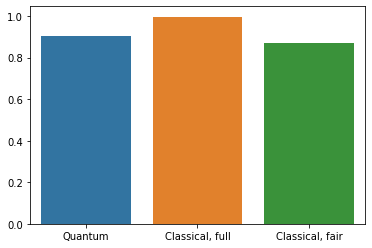

In [36]:
qnn_accuracy = qnn_results[1]
cnn_accuracy = cnn_results[1]
fair_nn_accuracy = fair_nn_results[1]

sns.barplot(["Quantum", "Classical, full", "Classical, fair"],
            [qnn_accuracy, cnn_accuracy, fair_nn_accuracy])